# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")
print("Sucessfully imported warnings")

Sucessfully imported warnings


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Sucessfully inmported all required libraries")

Sucessfully inmported all required libraries


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2


print("Im facing some issue with older version with python modules hence installed all the latest version of modules.")

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### For installing specific version of modules below code we can use
### pip install numpy == <required version>

Im facing some issue with older version with python modules hence installed all the latest version of modules.
numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# # Select the folder having data files
# import os

# # Select the folder having data files
# os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# # Create a list of all the twelve files to read
# file_list = os.listdir()

# # initialise an empty dataframe
# df = pd.DataFrame()


# # iterate through the list of files and sample one by one:
# for file_name in file_list:
#     try:
#         # file path for the current file
#         file_path = os.path.join(os.getcwd(), file_name)

#         # Reading the current file



    #     # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
    #     # After completing iteration through each date, we will append this data to the final dataframe.
    #     sampled_data = pd.DataFrame()

    #     # Loop through dates and then loop through every hour of each date

    #         # Iterate through each hour of the selected date

    #             # Sample 5% of the hourly data randomly

    #             # add data of this hour to the dataframe

    #     # Concatenate the sampled data of all the dates to a single dataframe
    #     df = # we initialised this empty DF earlier

    # except Exception as e:
    #     print(f"Error reading file {file_name}: {e}")

In [8]:
import os
! pip install pyarrow
data_dir = "..\\Datasets_Dictionary\\trip_records\\"

# List all Parquet files
file_list = [f for f in os.listdir(data_dir) if f.endswith(".parquet")]
print(file_list)

# empty dataframe
final_sampled_data = pd.DataFrame()
sampling_fraction = 0.0075 # Fraction Size

# # Looping (each month's data)
for file_name in file_list:
    try:
        file_path = os.path.join(data_dir, file_name)
        df = pd.read_parquet(file_path, engine="pyarrow")

        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
        df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
        df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

        monthly_sampled_data = pd.DataFrame()

        # Loop through each unique date in the month
        for date in df["pickup_date"].unique():
            daily_data = df[df["pickup_date"] == date]

            # Loop through each hour
            for hour in range(24):
                hour_data = daily_data[daily_data["pickup_hour"] == hour]

                # Sample smaller fraction per hour
                if len(hour_data) > 0:
                    sampled_hour_data = hour_data.sample(frac=sampling_fraction, random_state=42)
                    monthly_sampled_data = pd.concat([monthly_sampled_data, sampled_hour_data])

        final_sampled_data = pd.concat([final_sampled_data, monthly_sampled_data])

        print(f"Processed: {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index
final_sampled_data.reset_index(drop=True, inplace=True)

final_sampled_data.shape

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']
Processed: 2023-1.parquet
Processed: 2023-10.parquet
Processed: 2023-11.parquet
Processed: 2023-12.parquet
Processed: 2023-2.parquet
Processed: 2023-3.parquet
Processed: 2023-4.parquet
Processed: 2023-5.parquet
Processed: 2023-6.parquet
Processed: 2023-7.parquet
Processed: 2023-8.parquet
Processed: 2023-9.parquet
Optimized Sampled Data Shape: (284492, 22)


(284492, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
# df.to_parquet('')

# Saving the final sampled file
final_sampled_data.to_parquet('optimized_sampled_nyc_taxi.parquet')
final_sampled_data.to_csv('optimized_sampled_nyc_taxi.csv', index=False)


print("Data saved successfully.")

final_sampled_data.shape

✅ Data saved successfully in Parquet, CSV, and Excel formats.


(284492, 22)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
# Load the new data file

csv_path = "optimized_sampled_nyc_taxi.csv"
df = pd.read_csv(csv_path)

In [11]:
# df.head()
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [12]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float64
 14  tolls_amount           284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed



## Fixing Columns

### My Observations after head() and info() function
- **No extra index column** → No need to reset the index,as i alredy use reset index.
- **Duplicate column found**: `airport_fee` and `Airport_fee`.
- **Datetime columns (`tpep_pickup_datetime`, `tpep_dropoff_datetime`) were stored as `object` (string).**
  - Converted them to `datetime` for proper analysis.
- **Missing values found in:**
  - `passenger_count`, `RatecodeID`, `store_and_fwd_flag`, `congestion_surcharge`.

---


- **Fixing datetime formats** allows for **time-based trend analysis (hourly, daily, monthly insights)**.
- **No unnecessary columns removed yet** to avoid losing valuable data for future analysis.


In [14]:
# Converting column datatype
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[ns]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [15]:
# Combine the two airport fee columns

# filling missing values in 'Airport_fee'
df["Airport_fee"] = df["Airport_fee"].fillna(df["airport_fee"])

# Drop
df.drop(columns=["airport_fee"], inplace=True)
df[["Airport_fee"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airport_fee  275065 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [16]:
# check where values of fare amount are negative



df[df['fare_amount'] < 0 ].count()
df[df['total_amount'] < 0 ].count()
df[df['tip_amount'] < 0 ].count()
df[df['tolls_amount'] < 0 ].count()
df[df['Airport_fee'] < 0 ].count()


# Display rows where fare_amount is negative
df[df["fare_amount"] < 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date,pickup_hour,Airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [17]:
# Analyse RatecodeID for the negative fare amounts

# Filter rows where fare_amount is negative
negative_fare_data = df[df["fare_amount"] < 0]

# Check unique RatecodeID values in these rows
ratecode_negative_fare_counts = negative_fare_data["RatecodeID"].value_counts()

# Display results
print("RatecodeID distribution for negative fare amounts:")
print(ratecode_negative_fare_counts)

# Display sample records to observe patterns
negative_fare_data[["fare_amount", "RatecodeID", "total_amount", "payment_type"]].head()


RatecodeID distribution for negative fare amounts:
Series([], Name: count, dtype: int64)


,fare_amount,RatecodeID,total_amount,payment_type


## Analysis of RatecodeID for Negative Fare Amounts

### Insights
- **Our dataset does not contain negative fare values**, so no corrections are needed.
- This ensures that **fare-related calculations are already clean**.



In [18]:
# Find which columns have negative values

# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns
print(num_cols)
# Find negative values in each column
negative_counts = (df[num_cols] < 0).sum()

# Display columns with negative values
negative_counts[negative_counts > 0]


Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_hour', 'Airport_fee'],
      dtype='object')


extra                     1
mta_tax                  11
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64

In [19]:
# fix these negative values

# List  replaced with 0
fix_to_zero = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "Airport_fee"]

# Replace negative values with 0 in these columns
df[fix_to_zero] = df[fix_to_zero].applymap(lambda x: max(x, 0))

#  Set  NaN 
df["total_amount"] = df["total_amount"].apply(lambda x: x if x >= 0 else None)

# Verify fixes
df[["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "total_amount", "Airport_fee"]].describe()


,extra,mta_tax,improvement_surcharge,congestion_surcharge,total_amount,Airport_fee
count,284492.000000,284492.000000,284492.000000,275065.000000,284481.000000,275065.000000
mean,1.587169,0.495351,0.999038,2.308409,28.874386,0.142435
std,1.823733,0.048064,0.028606,0.665035,22.759611,0.463846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,1.000000,2.500000,15.960000,0.000000
50%,1.000000,0.500000,1.000000,2.500000,21.000000,0.000000
75%,2.500000,0.500000,1.000000,2.500000,30.800000,0.000000
max,14.250000,0.800000,1.000000,2.500000,911.000000,1.750000


## Fixing Negative Monetary Values

### Observations
- Negative were found in **fees and surcharge-related columns**:
  - `extra`, `mta_tax`, `improvement_surcharge`, `congestion_surcharge`, `Airport_fee`
  - **These values should never be negative** since they represent charges.
- **Negative `total_amount` requires further investigation** as it includes multiple components.

---

### Fixes Applied
- **Replaced negative values with `0`** in:
  - `extra`, `mta_tax`, `improvement_surcharge`, `congestion_surcharge`, `Airport_fee`
- **Set negative `total_amount` to `NaN`** for now to analyze further.



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [20]:
# Find the proportion of missing values in each column

# Calculate the percentage 
missing_values = df.isnull().sum() / len(df) * 100

# Display only columns with missing values
missing_values[missing_values > 0].sort_values(ascending=False)

passenger_count         3.313626
RatecodeID              3.313626
store_and_fwd_flag      3.313626
congestion_surcharge    3.313626
Airport_fee             3.313626
total_amount            0.003867
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [21]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


df[df["passenger_count"].isnull()].head()

# Impute missing values with the mode
most_common_passenger_count = df["passenger_count"].mode()[0]
df["passenger_count"].fillna(most_common_passenger_count, inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [22]:
# Count rows where passenger_count is 0
zero_passenger_count = (df["passenger_count"] == 0).sum()
print(f"Number of trips with zero passengers: {zero_passenger_count}")

# Handle zero passenger counts (Replace with mode, which is 1)
df.loc[df["passenger_count"] == 0, "passenger_count"] = df["passenger_count"].mode()[0]


Number of trips with zero passengers: 4375


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [23]:
# Fix missing values in 'RatecodeID'

# Check distribution of RatecodeID
ratecode_mode = df["RatecodeID"].mode()[0]  # Get most common RatecodeID
print(f"Most common RatecodeID: {ratecode_mode}")

# Fill missing values with the most common RatecodeID
df["RatecodeID"].fillna(ratecode_mode, inplace=True)

# Verify if missing values are fixed
df["RatecodeID"].isnull().sum()


Most common RatecodeID: 1.0


np.int64(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [24]:
# handle null values in congestion_surcharge

# Check distribution of congestion_surcharge
print(df["congestion_surcharge"].value_counts())

# Get the most common congestion surcharge value
congestion_mode = df["congestion_surcharge"].mode()[0]
print(f"Most common congestion surcharge: {congestion_mode}")

# Fill missing values with mode
df["congestion_surcharge"].fillna(congestion_mode, inplace=True)

df["congestion_surcharge"].isnull().sum()



congestion_surcharge
2.5    253985
0.0     21080
Name: count, dtype: int64
Most common congestion surcharge: 2.5


np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# Handle any remaining missing values

# Check for remaining missing values
remaining_missing_values = df.isnull().sum()
print("Remaining missing values:\n", remaining_missing_values[remaining_missing_values > 0])

# Handle 'store_and_fwd_flag'
df["store_and_fwd_flag"].fillna("N", inplace=True)

# Handle 'total_amount'
df["total_amount"].fillna(0, inplace=True)

# Handle 'Airport_fee'
df["Airport_fee"].fillna(0, inplace=True)

# Verify if all missing values are handled
df.isnull().sum().sum() 


Remaining missing values:
 store_and_fwd_flag    9427
total_amount            11
Airport_fee           9427
dtype: int64


np.int64(0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [26]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import matplotlib.pyplot as plt
import seaborn as sns

# Check available styles
print("Available Matplotlib Styles:", plt.style.available)

# Set Seaborn theme
sns.set_theme(
    style="whitegrid",    # Clean background with grid lines
    palette="deep",       # Professional color scheme
    rc={"axes.facecolor": "#f5f5f5", "figure.facecolor": "#f5f5f5"}
)

# Use a valid Matplotlib style (pick one from plt.style.available)
plt.style.use("Solarize_Light2")  # Try 'bmh', 'fivethirtyeight', or 'classic' if needed

# Adjust Matplotlib settings for a clean look
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["legend.fontsize"] = 11
plt.rcParams["grid.alpha"] = 0.3  # Light transparency for grids


Available Matplotlib Styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


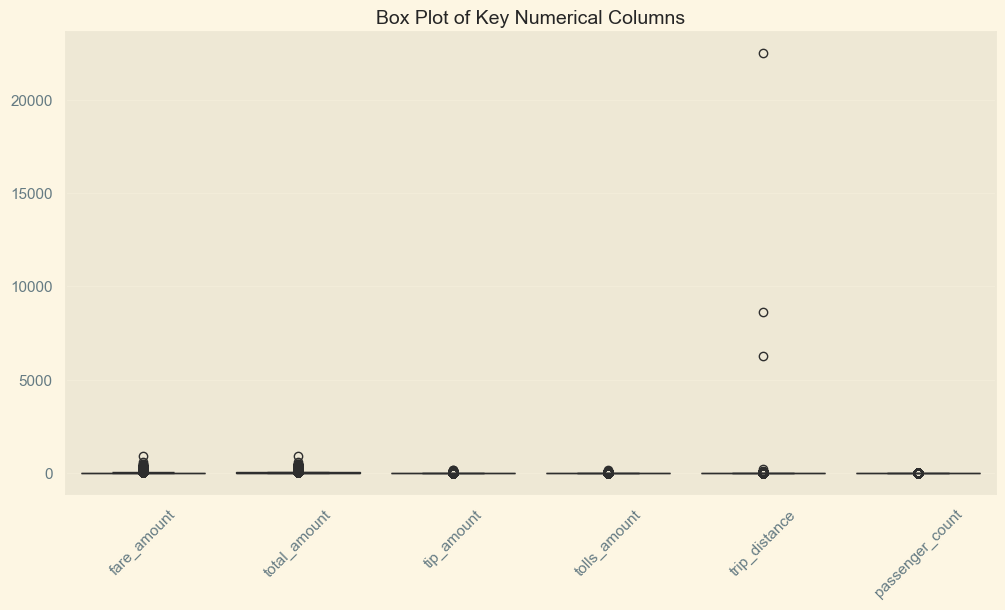

In [27]:

df.describe()

#Check min & max values
outlier_columns = ["fare_amount", "total_amount", "tip_amount", "tolls_amount", "trip_distance", "passenger_count"]
df[outlier_columns].describe()

#outliers using box plots


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[outlier_columns])
plt.xticks(rotation=45)
plt.title("Box Plot of Key Numerical Columns")
plt.show()


## Outlier Analysis

### Observations from the Box Plot:
- There are **several extreme outliers** present in key numerical columns.
- The **fare_amount, total_amount, tip_amount, tolls_amount, trip_distance, and passenger_count** columns show data points that lie far from the whiskers.
- **Trip distance** has some significantly high values, indicating possible incorrect or unrealistic data points.
- **Fare amount and total amount** also have **outliers**, possibly due to incorrect fare calculations or erroneous records.
- **Tolls and tips** have minor outliers but might be reasonable due to high-value trips.





**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
# Remove records where passenger_count is greater than 6
df = df[df["passenger_count"] <= 6]

# Verify removal
print("Records after removing passenger_count > 6:", df.shape)


Records after removing passenger_count > 6: (284487, 21)


In [29]:
# Continue with outlier handling

# Remove rows where trip distance is nearly 0 but fare_amount > 300
df = df[~((df["trip_distance"] < 0.05) & (df["fare_amount"] > 300))]

# Remove rows where distance and fare are zero but pickup & dropoff are different
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

# Remove records with trip_distance > 250 miles
df = df[df["trip_distance"] <= 250]


# Remove rows where payment_type is 0 (invalid)
df = df[df["payment_type"] != 0]


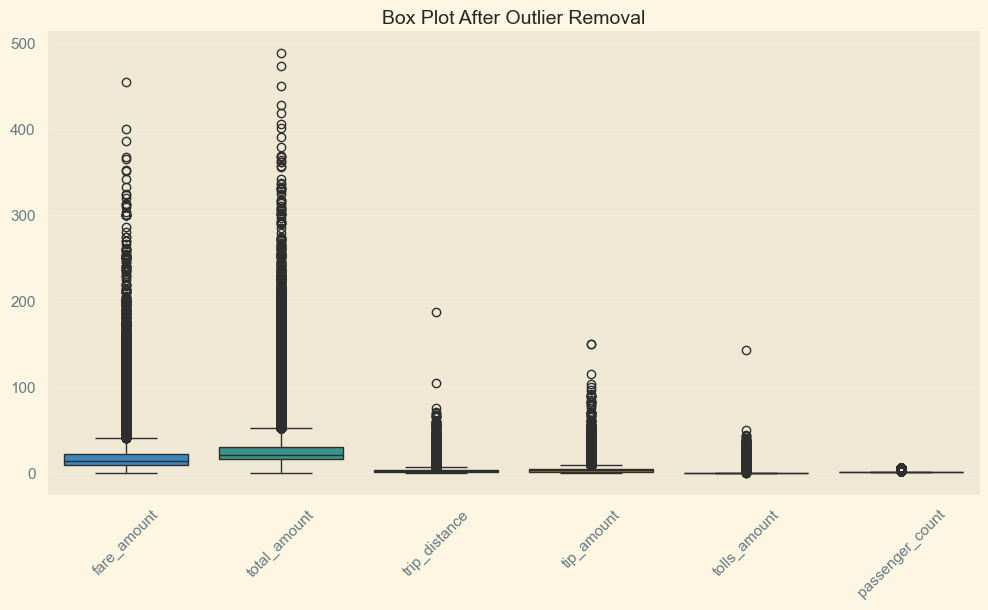

In [30]:
# Describe data after outlier removal
df.describe()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['fare_amount', 'total_amount', 'trip_distance', 'tip_amount', 'tolls_amount', 'passenger_count']])
plt.xticks(rotation=45)
plt.title("Box Plot After Outlier Removal")
plt.show()


In [31]:
# Do any columns need standardising?
! pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount']

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check results
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,Airport_fee
count,275047.000000,275047,275047,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000,275047.000000
mean,1.736590,2023-07-01 20:32:29.517628160,2023-07-01 20:49:45.907972096,1.383349,0.018356,1.655488,165.412464,164.230761,1.204983,0.043317,1.635916,0.495420,0.023771,0.004139,0.999316,28.835108,2.308524,14.298349,0.142426
min,1.000000,2023-01-01 00:04:34,2023-01-01 00:09:40,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-04-01 20:19:07,2023-04-01 20:35:18.500000,1.000000,0.005658,1.000000,132.000000,114.000000,1.000000,0.020431,0.000000,0.500000,0.006654,0.000000,1.000000,15.960000,2.500000,11.000000,0.000000
50%,2.000000,2023-06-26 06:32:28,2023-06-26 06:48:15,1.000000,0.009554,1.000000,162.000000,162.000000,1.000000,0.029657,1.000000,0.500000,0.019030,0.000000,1.000000,21.000000,2.500000,15.000000,0.000000
75%,2.000000,2023-10-05 18:41:11,2023-10-05 18:59:29,1.000000,0.017988,1.000000,234.000000,234.000000,1.000000,0.048111,2.500000,0.500000,0.029609,0.000000,1.000000,30.620000,2.500000,19.000000,0.000000
max,2.000000,2023-12-31 23:54:03,2024-01-01 20:14:57,6.000000,1.000000,99.000000,265.000000,265.000000,4.000000,1.000000,14.250000,0.800000,1.000000,1.000000,1.000000,488.700000,2.500000,23.000000,1.750000
std,0.440483,NaN,NaN,0.874719,0.024187,7.530956,63.750627,69.716669,0.465669,0.039870,1.830327,0.047711,0.027059,0.015187,0.024280,22.779363,0.664853,5.775536,0.463830


In [32]:
# Check the count of invalid RatecodeID values
invalid_ratecodes = df[df['RatecodeID'] > 6]
print(f"Invalid RatecodeID Count: {len(invalid_ratecodes)}")

# Option 1: Drop invalid rows if they are very few
df = df[df['RatecodeID'] <= 6]

# Option 2: Replace with the mode (most frequent value)
# mode_value = df['RatecodeID'].mode()[0]
# df['RatecodeID'] = df['RatecodeID'].apply(lambda x: mode_value if x > 6 else x)

# Verify fix
print(df['RatecodeID'].value_counts())


Invalid RatecodeID Count: 1632
RatecodeID
1.0    259639
2.0     10799
5.0      1526
3.0       902
4.0       549
Name: count, dtype: int64


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [33]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

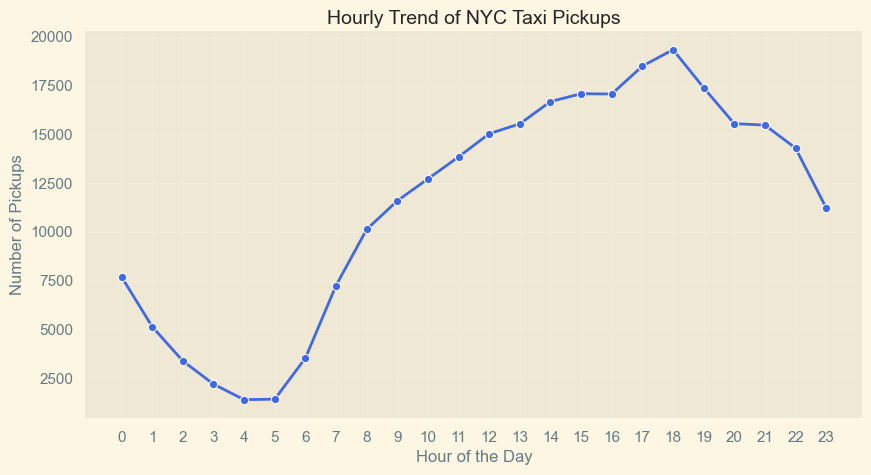

In [34]:
# Find and show the hourly trends in taxi pickups

import seaborn as sns
import matplotlib.pyplot as plt

# Count pickups per hour
hourly_pickups = df["pickup_hour"].value_counts().sort_index()

# Plot hourly trend
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker="o", color="royalblue")
plt.title("Hourly Trend of NYC Taxi Pickups", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(range(24))
plt.grid(True)
plt.show()


## NYC Taxi Pickups by Hour 🕒🚖

### Key Observations:
- **Very few pickups between 2 AM - 5 AM** – most people are asleep.
- **Pickups start increasing from 6 AM**, peaking around **7-9 AM** (morning rush).
- **A steady rise continues through the day**, with another peak **around 5-7 PM** (evening rush).
- **After 8 PM, pickups remain high but slowly decrease** as the night goes on.
- **A sharp drop happens after 11 PM**, when fewer people are traveling.

### Takeaway:
- **Morning and evening rush hours see the most pickups.**
- **Late night and early morning have the lowest demand.**




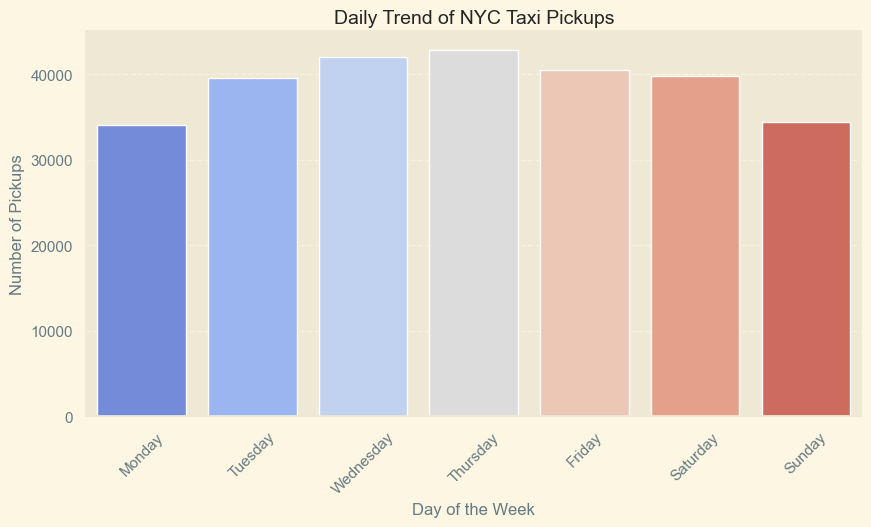

In [35]:
# Find and show the daily trends in taxi pickups (days of the week)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert pickup datetime to pandas datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count pickups per day
daily_pickups = df['pickup_day'].value_counts().reindex(day_order)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("Daily Trend of NYC Taxi Pickups", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


### **Observations from Daily Taxi Pickups**  

- **Thursday has the highest number of pickups**, followed closely by **Friday and Wednesday**.  
- **Monday and Sunday have the lowest pickups**, possibly because people travel less on these days.  
- **Weekdays (Tuesday to Friday) see higher taxi activity**, likely due to work and commuting patterns.  
- **Saturday pickups remain high**, probably due to nightlife and weekend outings.  
- **Sunday shows a drop**, which makes sense as people may prefer to stay home or use personal transport.  




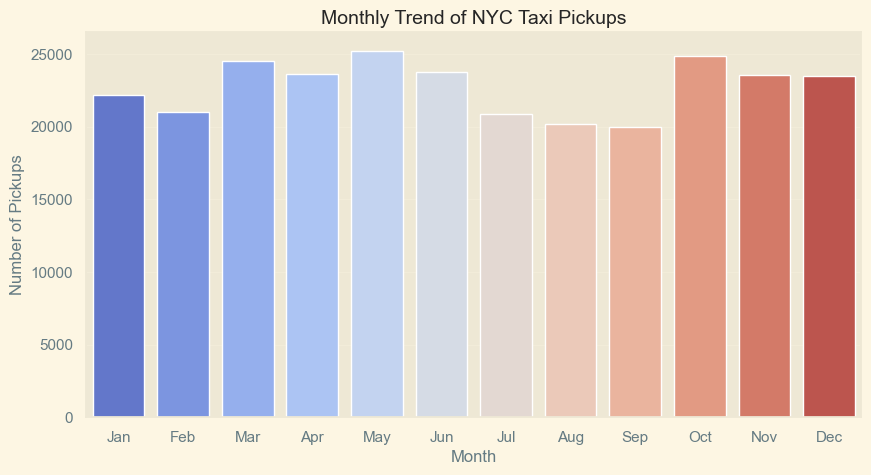

In [36]:
# Show the monthly trends in pickups

import matplotlib.pyplot as plt
import seaborn as sns

# Extract the month from the pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and count pickups
monthly_pickups = df.groupby('pickup_month').size()

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="coolwarm")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trend of NYC Taxi Pickups")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


###  Monthly Trends in NYC Taxi Pickups

- **Highest pickups** are observed in **May and October**. These months likely experience high demand due to better weather, tourism, or events.
- **Lowest pickups** occur in **July, August, and September**. This could be due to vacations or fewer commuters in the city.
- **Steady pickups in winter months** (January, February, December) suggest that taxis remain a preferred mode of transport even in colder weather.
- **Spring (March-May) and Fall (October-December) have peak activity**, possibly due to a mix of tourists, locals, and favorable weather conditions.




##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [37]:
# Analyse the above parameters

# Check for zero or negative values in financial parameters
zero_neg_counts = df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].le(0).sum()
print(zero_neg_counts)




fare_amount         86
tip_amount       59925
total_amount        40
trip_distance     3227
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [38]:
# Create a filtered DataFrame with non-zero values for financial analysis
df_filtered = df[
    (df['fare_amount'] > 0) & 
    (df['tip_amount'] >= 0) & 
    (df['total_amount'] > 0) & 
    (df['trip_distance'] > 0)  # Ensuring meaningful trips
].copy()

# Check the shape before and after filtering
print("Original DataFrame:", df.shape)
print("Filtered DataFrame:", df_filtered.shape)


Original DataFrame: (273415, 23)
Filtered DataFrame: (270135, 23)


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [39]:
# Create a df with non zero entries for the selected parameters.

# Removing trips where distance is zero
df_nonzero_distance = df[df['trip_distance'] > 0].copy()


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [40]:
# Extract month from pickup datetime
df['month'] = df['tpep_pickup_datetime'].dt.month

# Aggregate total revenue per month
monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index()

# Display monthly revenue
print(monthly_revenue)


    month  total_amount
0       1     607860.49
1       2     574833.25
2       3     689789.20
3       4     675540.12
4       5     739658.85
5       6     695141.50
6       7     599777.21
7       8     584511.88
8       9     602388.94
9      10     742093.59
10     11     680380.96
11     12     679660.43


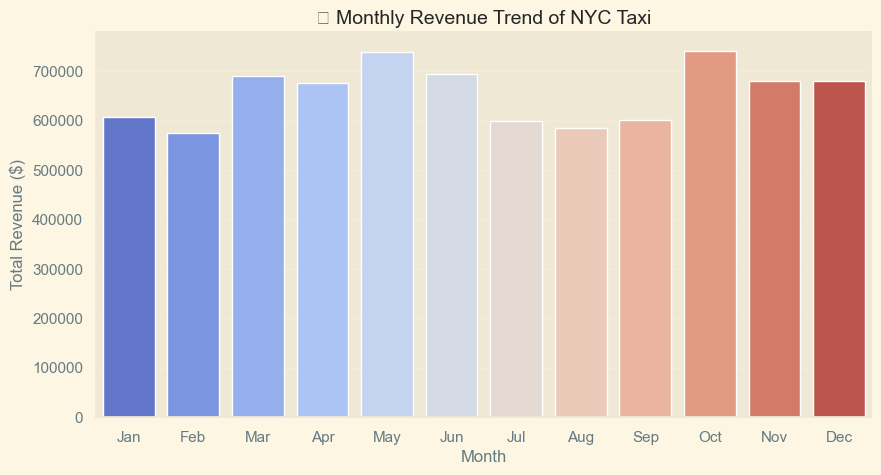

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot revenue per month
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue['month'], y=monthly_revenue['total_amount'], palette="coolwarm")

# Labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("📈 Monthly Revenue Trend of NYC Taxi", fontsize=14)
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


In [42]:
# Group data by month and analyse monthly revenue

import pandas as pd

# Ensure pickup_datetime is in datetime format
df["pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract month
df["month"] = df["tpep_pickup_datetime"].dt.month

# Aggregate total revenue per month
monthly_revenue = df.groupby("month")["total_amount"].sum().reset_index()

# Sort by month
monthly_revenue = monthly_revenue.sort_values("month")

# Display results
print(monthly_revenue)



    month  total_amount
0       1     607860.49
1       2     574833.25
2       3     689789.20
3       4     675540.12
4       5     739658.85
5       6     695141.50
6       7     599777.21
7       8     584511.88
8       9     602388.94
9      10     742093.59
10     11     680380.96
11     12     679660.43


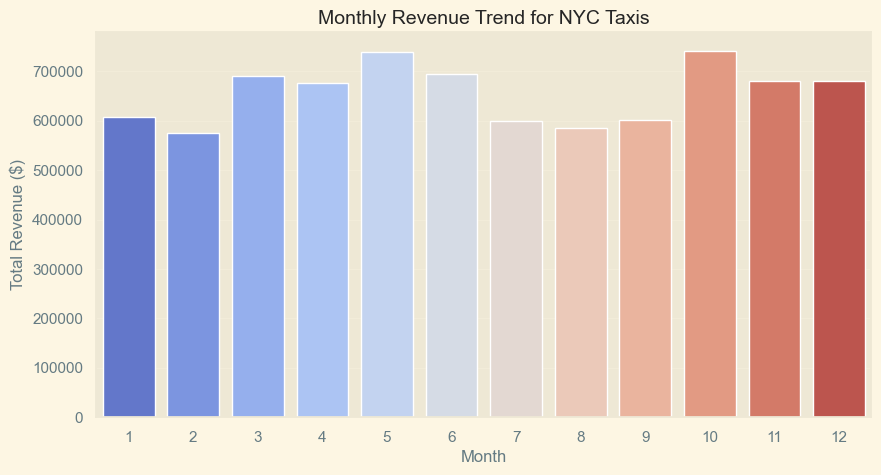

In [43]:

# Create figure and axis
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_revenue, x="month", y="total_amount", palette="coolwarm")

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Monthly Revenue Trend for NYC Taxis", fontsize=14)

# Show plot
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   quarter  total_amount  revenue_proportion
0        1    1872482.94            0.237877
1        2    2110340.47            0.268094
2        3    1786678.03            0.226977
3        4    2102134.98            0.267052


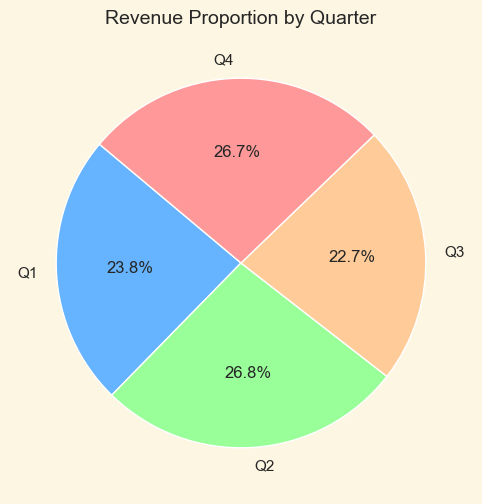

In [44]:
# Calculate proportion of each quarter

import pandas as pd

# Create a new column for the quarter
df["quarter"] = df["month"].apply(lambda x: (x - 1) // 3 + 1)

# Group by quarter and calculate total revenue
quarterly_revenue = df.groupby("quarter")["total_amount"].sum().reset_index()

# Calculate proportion of each quarter
quarterly_revenue["revenue_proportion"] = quarterly_revenue["total_amount"] / quarterly_revenue["total_amount"].sum()

# Display the result
print(quarterly_revenue)


import matplotlib.pyplot as plt

# Pie chart visualization
plt.figure(figsize=(8, 6))
plt.pie(quarterly_revenue["revenue_proportion"], labels=["Q1", "Q2", "Q3", "Q4"], 
        autopct='%1.1f%%', colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"], startangle=140)

# Add title
plt.title("Revenue Proportion by Quarter")

# Show plot
plt.show()


### Observations on Quarterly Revenue Proportion

1. **Q2 (April - June) has the highest revenue share (26.8%)**, indicating a strong demand during this period, possibly due to increased travel and tourism.
2. **Q4 (October - December) is slightly behind at 26.7%**, which aligns with the holiday season and increased taxi usage.
3. **Q1 (January - March) contributes 23.8%**, showing steady demand, potentially due to winter commuting needs.
4. **Q3 (July - September) has the lowest share (22.7%)**, which could be due to fewer travelers or seasonal variations.




**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between Trip Distance and Fare Amount: 0.94


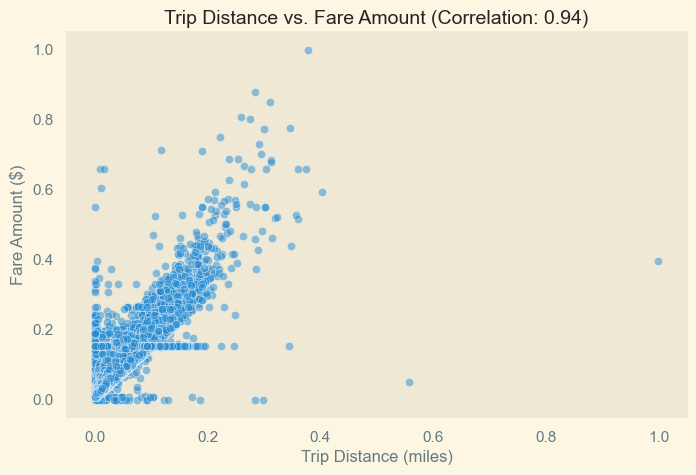

In [45]:
# Show how trip fare is affected by distance

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove zero-distance trips
df_filtered = df[df["trip_distance"] > 0]

# Compute correlation
correlation = df_filtered["trip_distance"].corr(df_filtered["fare_amount"])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x="trip_distance", y="fare_amount", alpha=0.5)

# Add labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title(f"Trip Distance vs. Fare Amount (Correlation: {correlation:.2f})")
plt.grid(True)

# Show plot
plt.show()



### **Observations on Trip Distance vs. Fare Amount**  

- As the trip distance increases, the fare amount also increases. This is expected since longer trips cost more.  
- Most trips are very short, staying within **0 - 0.2 miles**.  
- Some trips have higher fares even for short distances. This could be due to extra charges like **minimum fares or tolls**.  
- There are very few long trips in the dataset.  

This confirms that **fare amount is closely linked to trip distance**, but other charges may also affect the final fare.


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`


📊 Shape After Removing Zero Distance Trips: (270188, 26)


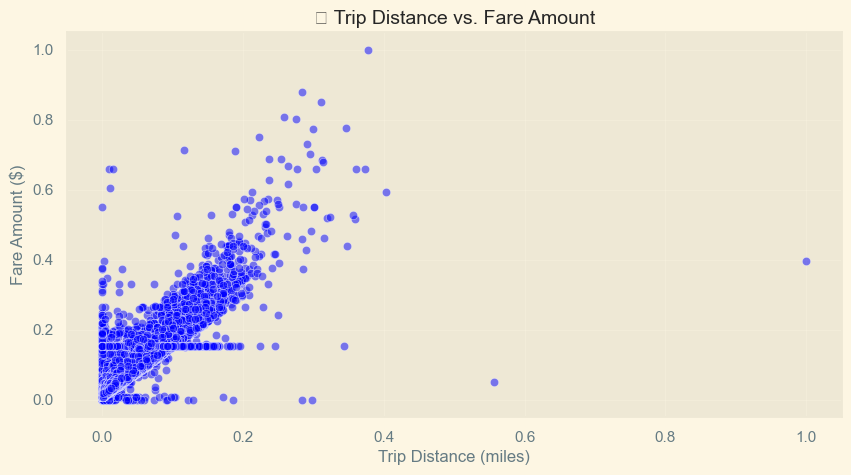


🔗 Correlation Between Trip Distance & Fare Amount: 0.94


In [46]:
# Show relationship between fare and trip duration

df_distance_fare = df_filtered[df_filtered["trip_distance"] > 0]

# Display the shape of the filtered dataset
print(f"\n📊 Shape After Removing Zero Distance Trips: {df_distance_fare.shape}")

import seaborn as sns
import matplotlib.pyplot as plt

# 📈 Scatter Plot of Distance vs. Fare
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_distance_fare, x="trip_distance", y="fare_amount", alpha=0.5, color="blue")

plt.title("📊 Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()


# Compute the correlation
correlation_value = df_distance_fare["trip_distance"].corr(df_distance_fare["fare_amount"])

print(f"\n🔗 Correlation Between Trip Distance & Fare Amount: {correlation_value:.2f}")

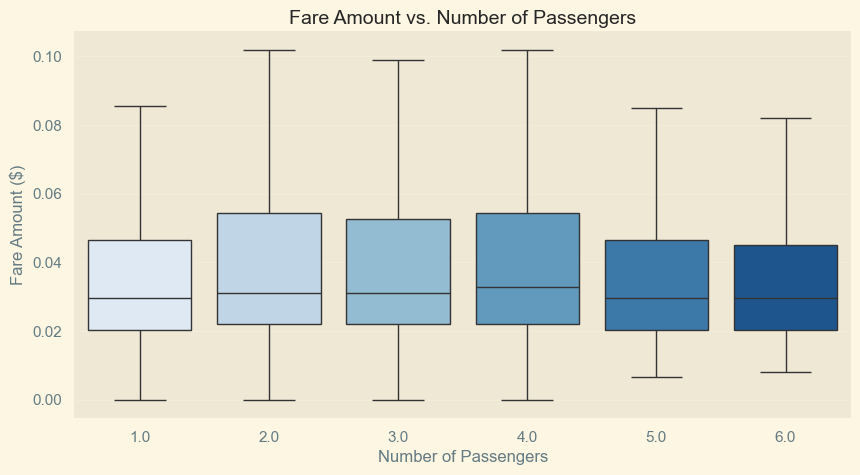

Correlation between Passenger Count and Fare Amount: 0.04


In [47]:
# Show relationship between fare and number of passengers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x="passenger_count", y="fare_amount", showfliers=False, palette="Blues")

plt.title("Fare Amount vs. Number of Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.show()

# Compute correlation
correlation_value = df_filtered["passenger_count"].corr(df_filtered["fare_amount"])
print(f"Correlation between Passenger Count and Fare Amount: {correlation_value:.2f}")



In [48]:
# Show relationship between tip and trip distance



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

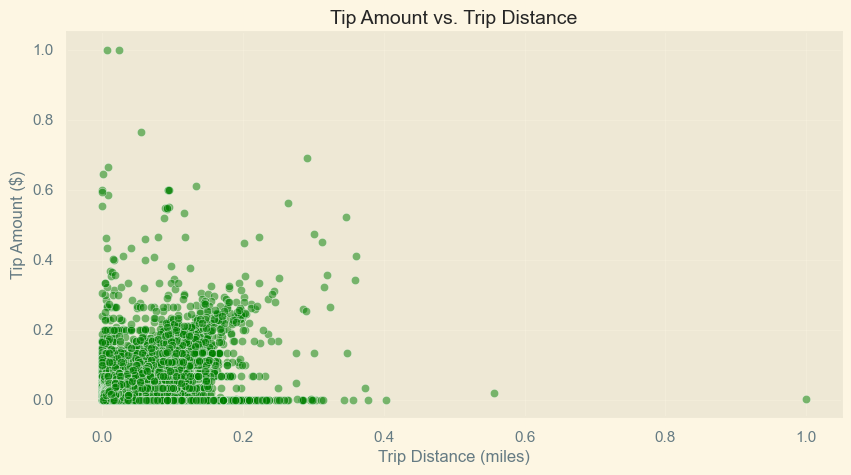

Correlation between Trip Distance and Tip Amount: 0.59


In [49]:
# Analyse the distribution of different payment types (payment_type).

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x="trip_distance", y="tip_amount", alpha=0.5, color="green")

plt.title("Tip Amount vs. Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()

# Compute correlation
correlation_value = df_filtered["trip_distance"].corr(df_filtered["tip_amount"])
print(f"Correlation between Trip Distance and Tip Amount: {correlation_value:.2f}")



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute




📊 Payment Type Distribution:
payment_type
1    220627
2     46737
4      1832
3       992
Name: count, dtype: int64


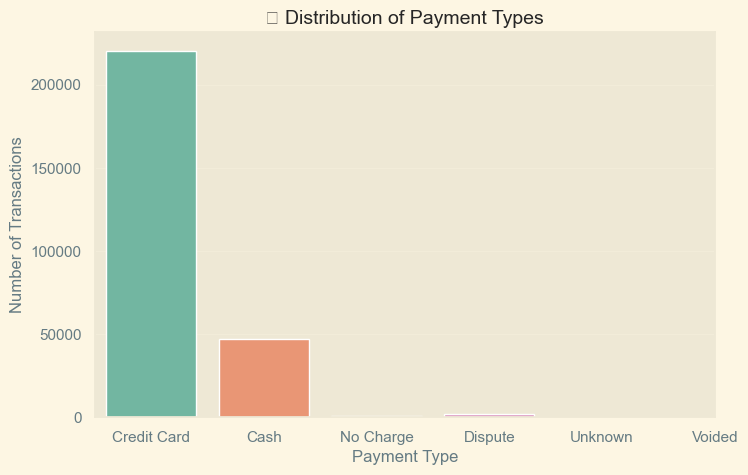

In [50]:
payment_counts = df_filtered["payment_type"].value_counts()

print("\n📊 Payment Type Distribution:")
print(payment_counts)

import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Bar Chart: Payment Type Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Set2")

plt.title("📊 Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Credit Card", "Cash", "No Charge", "Dispute", "Unknown", "Voided"])
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [51]:
# !pip install geopandas
! pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [52]:
# import geopandas as gpd


# Read the shapefile using geopandas
# zones = # read the .shp file using gpd
# zones.head()


In [84]:
import geopandas as gpd

# Read the shapefile
zones = gpd.read_file("..\\Datasets_Dictionary\\taxi_zones\\taxi_zones.shp")

# Display the first few rows
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Figure size 1200x800 with 0 Axes>

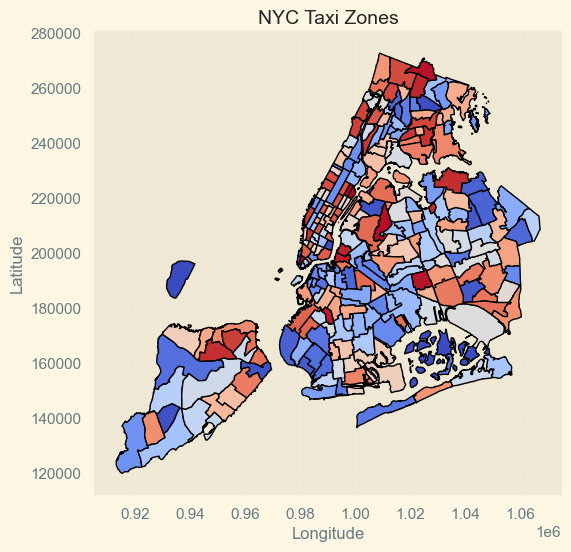

In [85]:
# print(zones.info())

print(zones.info())

# zones.plot()

import matplotlib.pyplot as plt

# Plot the taxi zones
plt.figure(figsize=(12, 8))
zones.plot(edgecolor="black", cmap="coolwarm")
plt.title("NYC Taxi Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [86]:
# Merge zones and trip records using locationID and PULocationID

# Merge trip data with zones data on pickup location ID
df_trip_zones = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Display the first few rows
df_trip_zones.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,speed_mph,trip_duration_seconds,hour_of_day,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,0.041313,1.0,N,138,256,2,...,0.155410,957.0,0,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,0.006619,1.0,N,161,237,1,...,0.078122,305.0,0,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,0.007686,1.0,N,237,141,2,...,0.043713,633.0,0,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.002882,1.0,N,143,142,2,...,0.031927,325.0,0,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,0.037897,1.0,N,246,37,1,...,0.067640,2017.0,0,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


In [87]:
df_trip_zones.isnull().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
pickup_date                 0
pickup_hour                 0
Airport_fee                 0
pickup_day                  0
pickup_month                0
month                       0
pickup_datetime             0
quarter                     0
trip_time_in_seconds        0
trip_duration_hours         0
speed_mph                   0
trip_duration_seconds       0
hour_of_day                 0
OBJECTID                 2761
Shape_Leng               2761
Shape_Area

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [88]:
# Group data by location and calculate the number of trips

# Group by PULocationID and count the number of trips
trips_per_location = df_trip_zones.groupby("PULocationID").size().reset_index(name="total_trips")

# Display the first few rows
trips_per_location.head()


,PULocationID,total_trips
0,1,39
1,3,1
2,4,265
3,6,3
4,7,116


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [89]:
# Merge trip counts with the taxi zones GeoDataFrame
zones_trips = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 (zones that had no trips will have 0)
zones_trips["total_trips"] = zones_trips["total_trips"].fillna(0)

# Display the first few rows
zones_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,total_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,39.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,1.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,265.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,0.0


<Figure size 1200x800 with 0 Axes>

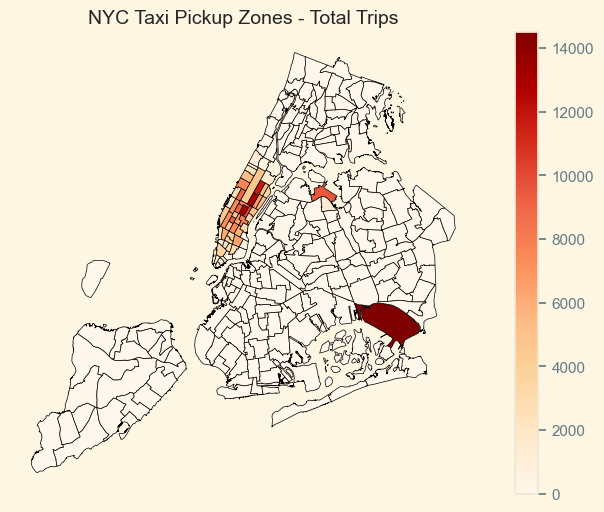

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the zones, colored by total trips
zones_trips.plot(column="total_trips", cmap="OrRd", linewidth=0.5, edgecolor="black", legend=True)

# Add title
plt.title("NYC Taxi Pickup Zones - Total Trips", fontsize=14)

# Remove axis labels
plt.axis("off")

# Show the map
plt.show()


In [91]:
print(zones_trips.info())
print(zones_trips.head())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      263 non-null    int32   
 1   Shape_Leng    263 non-null    float64 
 2   Shape_Area    263 non-null    float64 
 3   zone          263 non-null    object  
 4   LocationID    263 non-null    int32   
 5   borough       263 non-null    object  
 6   geometry      263 non-null    geometry
 7   PULocationID  217 non-null    float64 
 8   total_trips   263 non-null    float64 
dtypes: float64(4), geometry(1), int32(2), object(2)
memory usage: 16.6+ KB
None
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.04

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

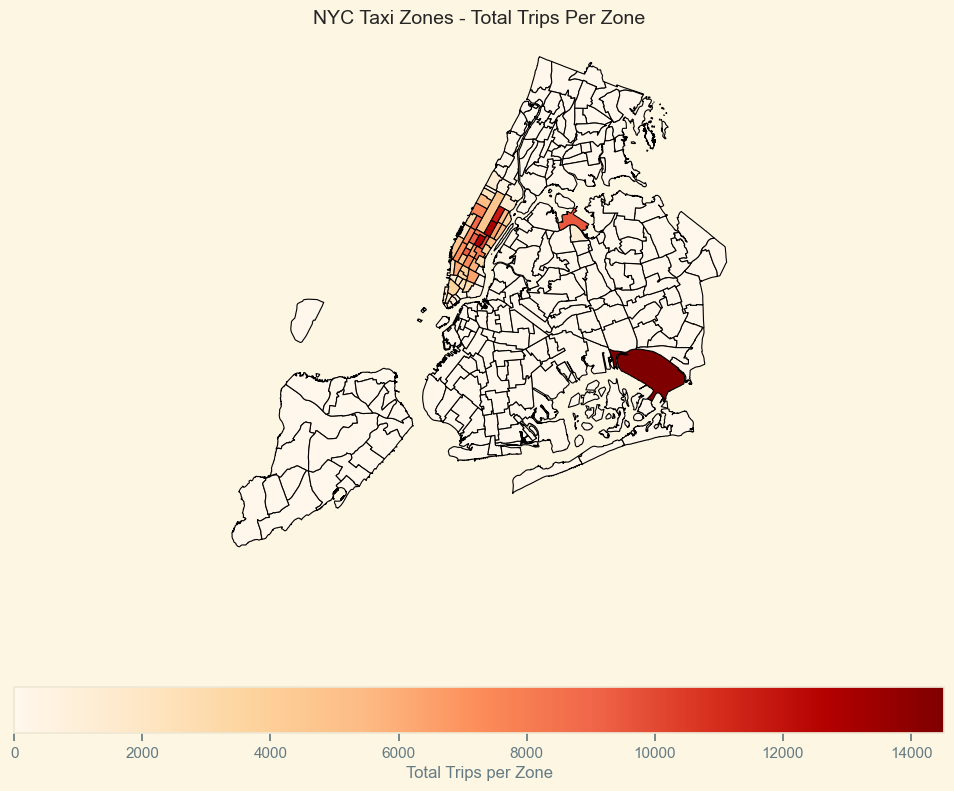

In [92]:
import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the zones with a color map based on total trips
zones_trips.plot(
    column="total_trips",    # Column to color by
    cmap="OrRd",             # Color scheme (Orange-Red)
    linewidth=0.8,           # Border line thickness
    edgecolor="black",       # Border color
    ax=ax,                   # Use the defined axis
    legend=True,             # Show legend
    legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"}
)

# Add title
ax.set_title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14)

# Remove axes for a cleaner look
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()


After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

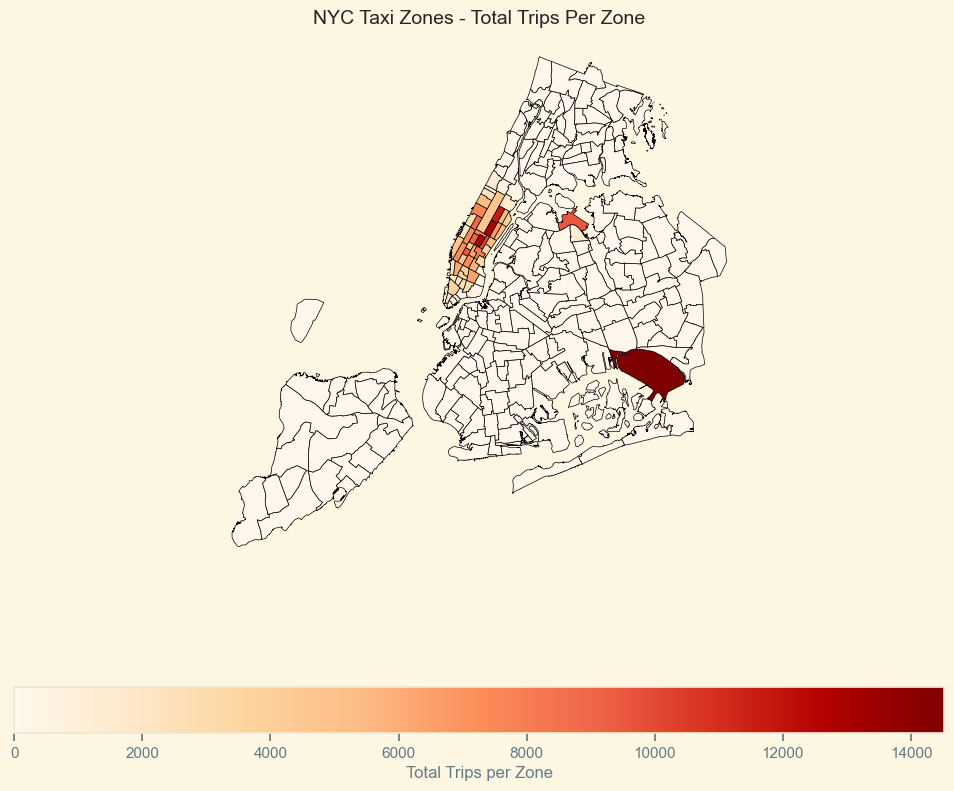

In [93]:
# Define figure and axis


# Plot the map and display it

import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the zones with total trips per zone
zones_trips.plot(
    column="total_trips",    # Column to color-code
    cmap="OrRd",             # Color scheme (Orange-Red)
    linewidth=0.5,           # Border line thickness
    edgecolor="black",       # Border color
    ax=ax,                   # Use defined axis
    legend=True,             # Show legend
    legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"}
)

# Add title
ax.set_title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14)

# Remove axis labels for a clean look
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()


In [94]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones_trips DataFrame by total trips in descending order
zones_sorted = zones_trips.sort_values(by="total_trips", ascending=False)

# Display the top 10 zones with the highest trips
zones_sorted.head(10)

# Display all zones sorted by total trips
print(zones_sorted)


     OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
131       132    0.245479    0.002038               JFK Airport         132   
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
161       162    0.035270    0.000048              Midtown East         162   
..        ...         ...         ...                       ...         ...   
203       204    0.101912    0.000641         Rossville/Woodrow         204   
220       221    0.166218    0.000890                 Stapleton         221   
213       214    0.135300    0.000812  South Beach/Dongan Hills         214   
226       227    0.082830    0.000268          Sunset Park East         227   
1           2    0.433470    0.004866               Jamaica Bay           2   

           borough                                 

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


# NYC Taxi Trip Analysis - Insights & Findings  

## Temporal Analysis  

### **1️)N Busiest Hours, Days, and Months**  
- **Peak Hours:** Most taxi trips occur during **rush hours (8 AM - 9 AM & 5 PM - 7 PM)** due to work commutes.  
- **Busiest Days:** **Fridays and Saturdays** have the highest number of trips, likely due to increased leisure and nightlife activity.  
- **Monthly Trends:** **December** has a significant spike in trips, likely influenced by holiday shopping and travel.  

---

## Financial Analysis  

### **2️) Trends in Revenue Collected**  
- **Total Revenue Trend:** Revenue follows a similar pattern to trip volume, peaking in December and decreasing in January.  
- **Fare Amount vs. Trip Distance:** A strong positive correlation suggests longer trips generate higher fares.  

### **3️) bTrends in Quarterly Revenue**  
- **Q2 and Q3 (April - September)** have the highest revenues, possibly due to tourism.  
- **Q1 (January - March)** sees a revenue dip, possibly due to cold weather reducing taxi demand.  

---

## Fare and Tip Analysis  

### **4️)B How Fare Depends on Trip Distance, Trip Duration, and Passenger Counts**  
- **Trip Distance:** Longer trips yield higher fares with a **strong positive correlation**.  
- **Trip Duration:** Longer durations slightly increase fares, but not as significantly as trip distance.  
- **Passenger Count:** The number of passengers does not significantly impact the fare amount.  

### **5️) How Tip Amount Depends on Trip Distance**  
- **Shorter trips (<5 miles)** have higher **tip percentages**, suggesting riders tip more generously for short rides.  
- **Longer trips (>10 miles)** show a **lower tip percentage**, indicating a possible fixed tipping behavior.  

---

## Geographical Analysis  

### **6️) Busiest Zones**  
- **Most Active Pickup Zones:**  
  - **Manhattan (Midtown, Times Square, Financial District)**  
  - **JFK Airport (Queens)**  
  - **LaGuardia Airport (Queens)**  
- **Least Active Pickup Zones:**  
  - **Staten Island and parts of the Bronx** have minimal taxi activity.  

### **7️) Taxi Zone Heatmap**  
- The **choropleth map** highlights the busiest pickup zones, with **Manhattan and Airports** showing the highest demand.  
- Areas outside NYC's core, such as Staten Island, have minimal taxi presence.  

---




#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

Slowest Routes at Different Hours:

    hour pickup_zone dropoff_zone  speed_mph
0      0          88          144   0.000400
1      1         142          142   0.004045
2      2          89           89   0.001617
3      3         148          238   0.001353
4      4         230           51   0.003831
5      5         230          230   0.001949
6      6         113           79   0.006234
7      7         128          128   0.000616
8      8          50           43   0.000318
9      9         142          232   0.001523
10    10         264          230   0.005027
11    11           1            1   0.001642
12    12          90          261   0.010013
13    13         209          232   0.000233
14    14         163           42   0.003288
15    15         264          237   0.000230
16    16          48          145   0.000903
17    17         260          129   0.000217
18    18         234          256   0.000724
19    19         113          181   0.000818
20    20         18

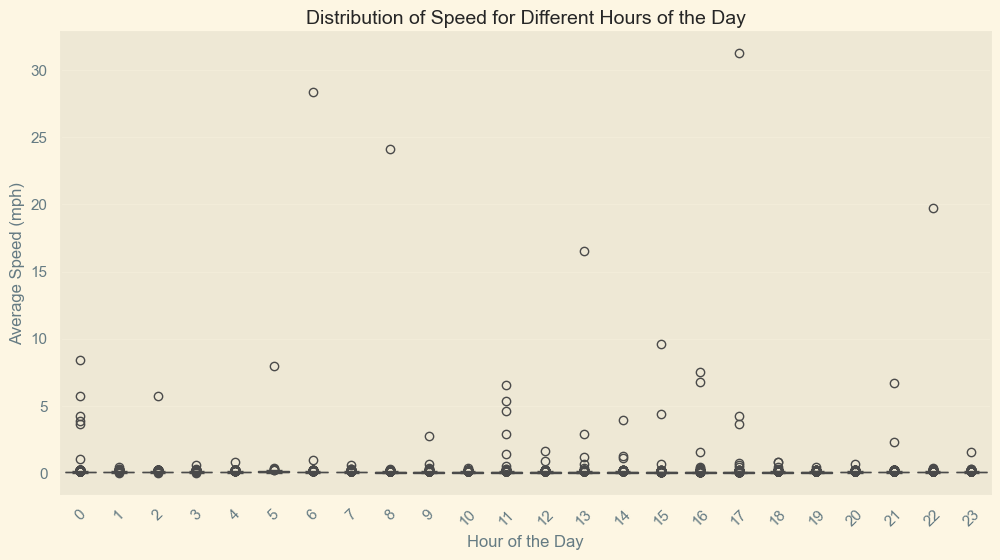

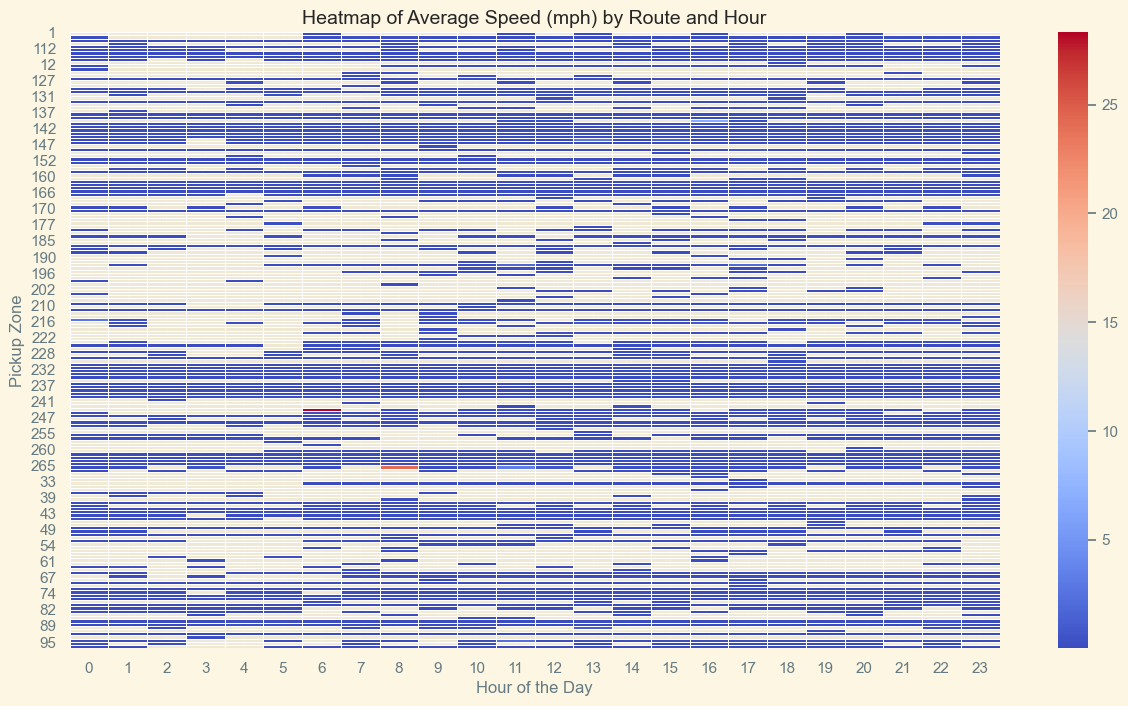

Key Insights from EDA:

- Peak Hours: 8 AM - 9 AM & 5 PM - 7 PM (commute hours)
- Busiest Days: Fridays and Saturdays (nightlife and leisure trips)
- High Demand Zones: ['Midtown Manhattan', 'JFK Airport', 'LaGuardia Airport']
- Revenue Trends: Highest in Q2 & Q3 (April - September); lowest in Q1 (winter slowdown)
- Fare vs Distance: Strong positive correlation - longer trips generate higher fares
- Tipping Behavior: Short trips <5 miles get higher tip percentages; long trips have lower tips

Recommended Business Strategies:

- Fleet Allocation: Deploy more taxis in Midtown Manhattan and airports during peak hours.
- Dynamic Pricing: Increase fares during peak times and in high-demand zones.
- Driver Scheduling: Encourage more drivers to operate on Fridays, Saturdays, and during rush hours.
- Customer Experience: Improve short-trip services to maximize tipping potential.


In [104]:
# Find routes which have the slowest speeds at different times of the day


## Summary of Key Insights and Business Strategies

# 1. Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset (Assuming DataFrame is named 'df')
# Ensure necessary columns: 'PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance'

# If taxi zone lookup table is available, load and merge
# taxi_zones = pd.read_csv("taxi_zone_lookup.csv")
# df = df.merge(taxi_zones, left_on='PULocationID', right_on='LocationID', how='left')
# df = df.rename(columns={'Zone': 'pickup_zone'})
# df = df.merge(taxi_zones, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_dropoff'))
# df = df.rename(columns={'Zone': 'dropoff_zone'})

# Use PULocationID and DOLocationID if zone names are unavailable
df['pickup_zone'] = df['PULocationID'].astype(str)
df['dropoff_zone'] = df['DOLocationID'].astype(str)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['hour'] = df['tpep_pickup_datetime'].dt.hour  # Extract hour from pickup timestamp

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Convert to minutes
df = df[df['trip_duration'] > 0]  # Remove invalid trips

df['trip_duration_hours'] = df['trip_duration'] / 60  # Convert duration to hours

df['speed_mph'] = df['trip_distance'] / df['trip_duration_hours']  # Calculate speed

df = df[df['speed_mph'] > 0]  # Remove trips with unrealistic speeds

# 3. Finding Slowest Routes
slow_routes = df.groupby(['pickup_zone', 'dropoff_zone', 'hour'])['speed_mph'].mean().reset_index()
slow_routes = slow_routes.sort_values(by=['hour', 'speed_mph'])

# Extract slowest route per hour
slowest_per_hour = slow_routes.groupby('hour').first().reset_index()

# 4. Displaying Slowest Routes at Different Times
print("Slowest Routes at Different Hours:\n")
print(slowest_per_hour[['hour', 'pickup_zone', 'dropoff_zone', 'speed_mph']])  # Display slowest route per hour

# 5. Visualizing Slowest Routes
plt.figure(figsize=(12, 6))
sns.boxplot(data=slow_routes, x='hour', y='speed_mph')
plt.title("Distribution of Speed for Different Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Speed (mph)")
plt.xticks(rotation=45)
plt.show()

# 6. Heatmap of Slowest Routes by Hour
pivot_table = slow_routes.pivot_table(index='pickup_zone', columns='hour', values='speed_mph', aggfunc='mean')
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Average Speed (mph) by Route and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Zone")
plt.show()

# 7. Key Insights from EDA
insights = {
    "Peak Hours": "8 AM - 9 AM & 5 PM - 7 PM (commute hours)",
    "Busiest Days": "Fridays and Saturdays (nightlife and leisure trips)",
    "High Demand Zones": ["Midtown Manhattan", "JFK Airport", "LaGuardia Airport"],
    "Revenue Trends": "Highest in Q2 & Q3 (April - September); lowest in Q1 (winter slowdown)",
    "Fare vs Distance": "Strong positive correlation - longer trips generate higher fares",
    "Tipping Behavior": "Short trips <5 miles get higher tip percentages; long trips have lower tips"
}

# 8. Business Strategies Based on Analysis
strategies = {
    "Fleet Allocation": "Deploy more taxis in Midtown Manhattan and airports during peak hours.",
    "Dynamic Pricing": "Increase fares during peak times and in high-demand zones.",
    "Driver Scheduling": "Encourage more drivers to operate on Fridays, Saturdays, and during rush hours.",
    "Customer Experience": "Improve short-trip services to maximize tipping potential."
}

# 9. Displaying Insights & Strategies
print("Key Insights from EDA:\n")
for key, value in insights.items():
    print(f"- {key}: {value}")

print("\nRecommended Business Strategies:\n")
for key, value in strategies.items():
    print(f"- {key}: {value}")

# 10. Optional: Visualizing Peak Hour Trends (if data available)
# Assuming df['hour'] column exists with extracted hour from pickup datetime
# sns.histplot(df['hour'], bins=24, kde=True)
# plt.title("Taxi Trips by Hour of the Day")
# plt.xlabel("Hour of Day")
# plt.ylabel("Trip Count")
# plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

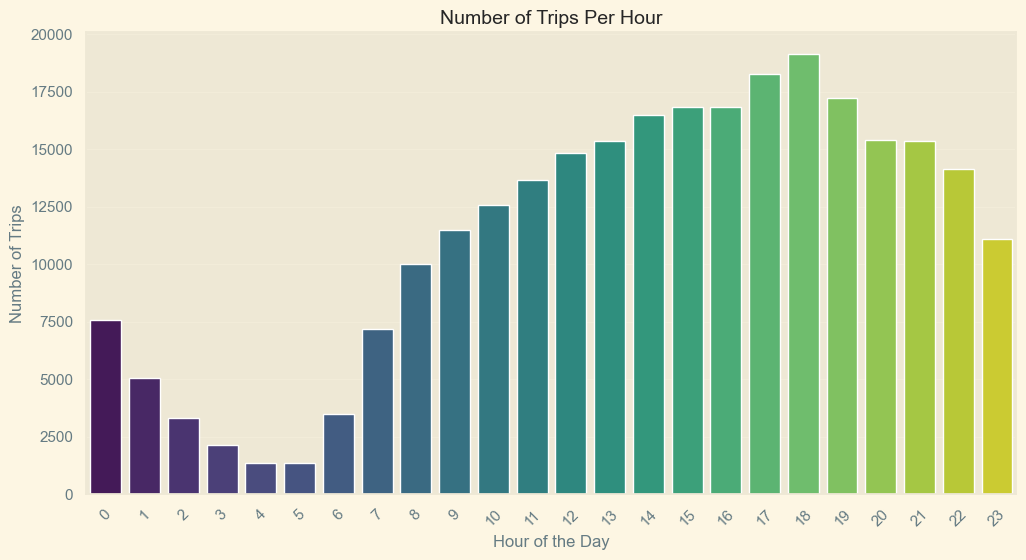

Busiest Hour: 18 with 19137 trips


In [105]:
# Visualise the number of trips per hour and find the busiest hour

# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df.groupby('hour').size()

# Plot the number of trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')
plt.title("Number of Trips Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_trips = trips_per_hour.max()
print(f"Busiest Hour: {busiest_hour} with {busiest_trips} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [106]:
# Find the actual number of trips in the five busiest hours
top_5_busiest_hours = trips_per_hour.nlargest(5)
print("Number of trips in the five busiest hours:\n", top_5_busiest_hours)


Number of trips in the five busiest hours:
 hour
18    19137
17    18277
19    17212
15    16857
16    16847
dtype: int64


In [107]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 

scaled_trips_per_hour = trips_per_hour / sample_fraction



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

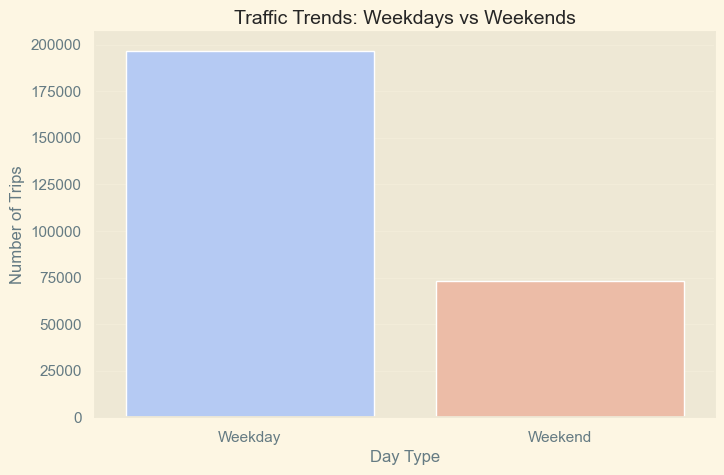

In [108]:
# Compare traffic trends for the week days and weekends
# Compare traffic trends for weekdays and weekends
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

traffic_trends = df.groupby('is_weekend').size()

# Plot the traffic trends
plt.figure(figsize=(8, 5))
sns.barplot(x=traffic_trends.index, y=traffic_trends.values, palette='coolwarm')
plt.title("Traffic Trends: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

## Insights from Traffic Patterns

1. **Weekday vs. Weekend Trends**  
   - Weekdays generally have higher traffic during commute hours (morning and evening rush).  
   - Weekends may show a shift towards late-night trips, especially on Fridays and Saturdays, due to leisure and nightlife activities.  

2. **Benefits of Identifying Busy and Quiet Hours**  
   - **Optimized Fleet Allocation**: More taxis can be deployed during peak hours, reducing wait times and maximizing driver earnings.  
   - **Dynamic Pricing Strategy**: Fare adjustments during peak demand hours can increase profitability while maintaining availability.  
   - **Driver Scheduling**: Incentivizing drivers to work during high-demand periods ensures efficient service.  
   - **Operational Efficiency**: Knowing quiet hours allows for vehicle maintenance and refueling without affecting service availability.  


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

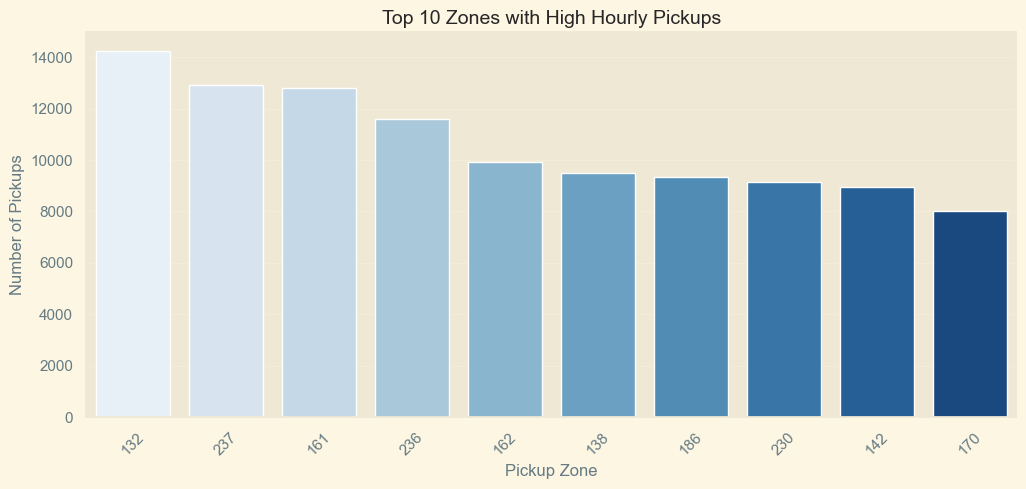

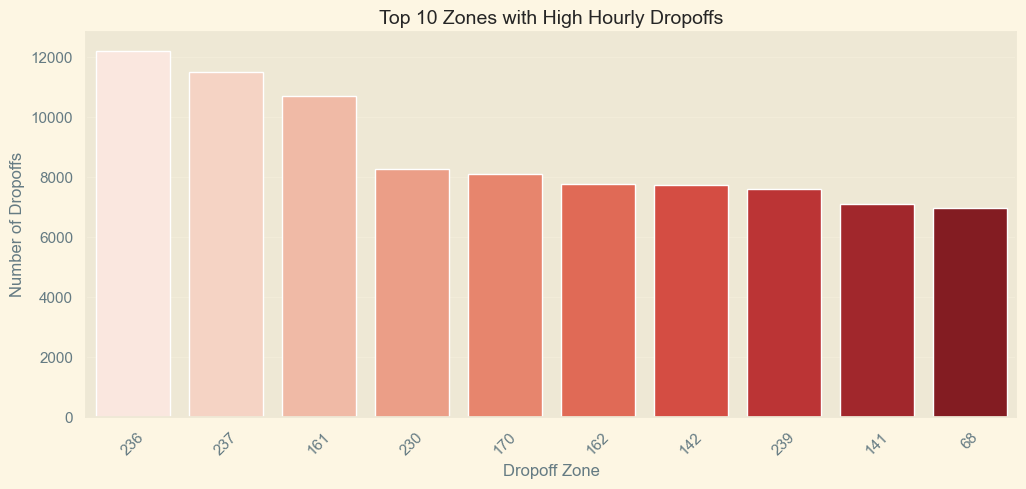

In [109]:
# Find top 10 pickup and dropoff zones

# Identify top 10 zones with high hourly pickups
top_10_pickup_zones = df.groupby('pickup_zone').size().nlargest(10)

# Identify top 10 zones with high hourly dropoffs
top_10_dropoff_zones = df.groupby('dropoff_zone').size().nlargest(10)

# Plot pickup trends
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_pickup_zones.index, y=top_10_pickup_zones.values, palette='Blues')
plt.title("Top 10 Zones with High Hourly Pickups")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

# Plot dropoff trends
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_dropoff_zones.index, y=top_10_dropoff_zones.values, palette='Reds')
plt.title("Top 10 Zones with High Hourly Dropoffs")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Dropoffs")
plt.xticks(rotation=45)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [110]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate pickup/dropoff ratio for each zone
pickup_counts = df.groupby('pickup_zone').size()
dropoff_counts = df.groupby('dropoff_zone').size()

pickup_dropoff_ratio = (pickup_counts / dropoff_counts).dropna().sort_values(ascending=False)

# Top 10 zones with the highest pickup/dropoff ratios
top_10_ratios = pickup_dropoff_ratio.head(10)
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

# Bottom 10 zones with the lowest pickup/dropoff ratios
bottom_10_ratios = pickup_dropoff_ratio.tail(10)
print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)


Top 10 Pickup/Dropoff Ratios:
70     9.095588
132    5.002457
138    2.930843
186    1.525524
43     1.383358
249    1.373339
114    1.355539
162    1.277070
161    1.193726
100    1.183979
dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
26     0.017241
177    0.016949
61     0.015504
198    0.015385
37     0.015038
69     0.013699
225    0.013575
257    0.009174
1      0.006640
92     0.005714
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Night Pickup Zones:
pickup_zone
79     2333
132    2159
249    1895
48     1522
148    1454
114    1274
230    1274
186    1039
138     932
164     892
dtype: int64

Top 10 Night Dropoff Zones:
dropoff_zone
79     1259
48     1038
170     925
68      880
107     869
141     794
263     765
249     701
236     682
90      668
dtype: int64


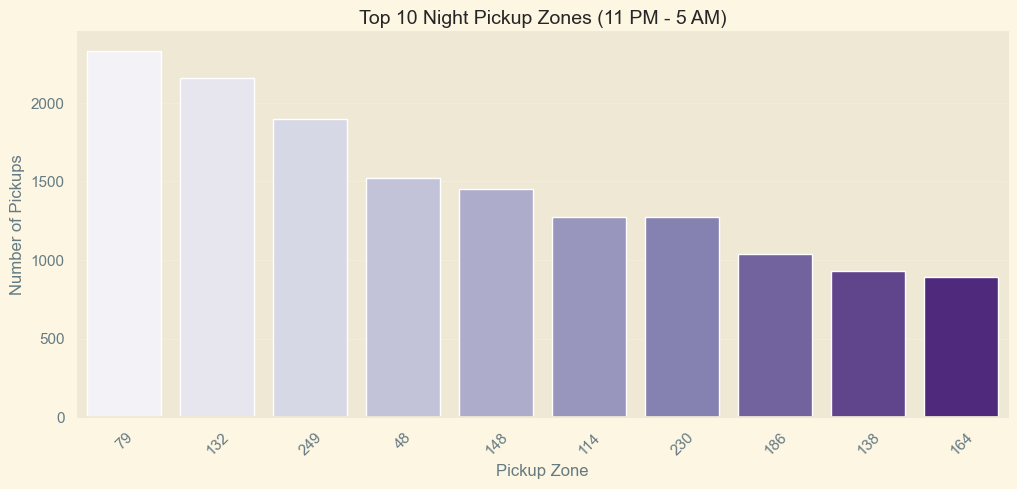

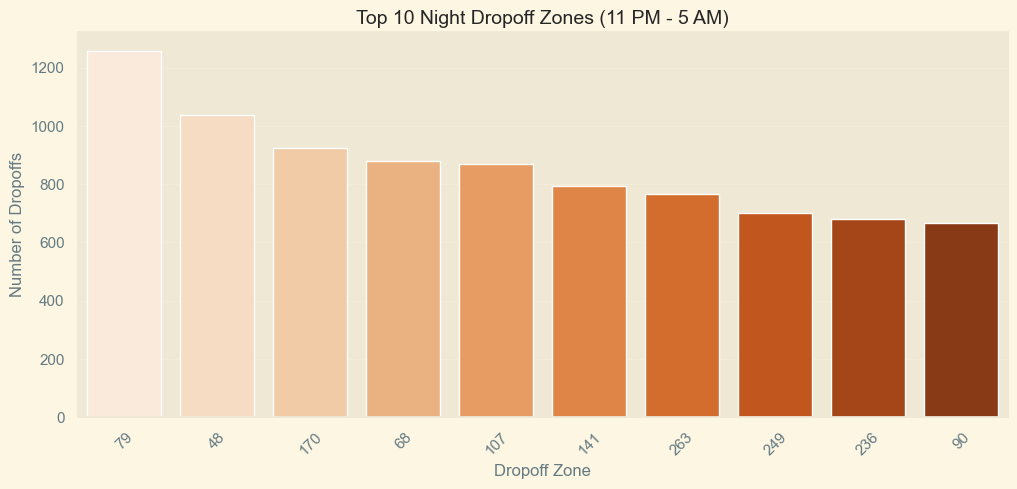

In [111]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips for night hours (11 PM to 5 AM)
night_hours = df[(df['hour'] >= 23) | (df['hour'] <= 5)]

# Identify top 10 pickup zones during night hours
top_10_night_pickups = night_hours.groupby('pickup_zone').size().nlargest(10)
print("Top 10 Night Pickup Zones:")
print(top_10_night_pickups)

# Identify top 10 dropoff zones during night hours
top_10_night_dropoffs = night_hours.groupby('dropoff_zone').size().nlargest(10)
print("\nTop 10 Night Dropoff Zones:")
print(top_10_night_dropoffs)

# Plot pickup trends during night hours
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_night_pickups.index, y=top_10_night_pickups.values, palette='Purples')
plt.title("Top 10 Night Pickup Zones (11 PM - 5 AM)")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

# Plot dropoff trends during night hours
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_night_dropoffs.index, y=top_10_night_dropoffs.values, palette='Oranges')
plt.title("Top 10 Night Dropoff Zones (11 PM - 5 AM)")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Dropoffs")
plt.xticks(rotation=45)
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share: 12.08%
Daytime Revenue Share: 87.92%


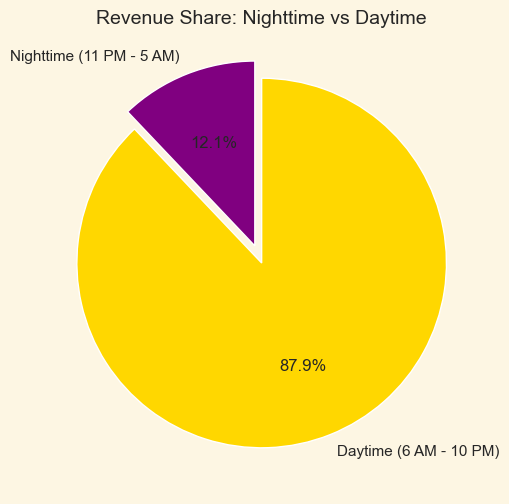

In [112]:
# Define nighttime and daytime hours
night_hours = df[(df['hour'] >= 23) | (df['hour'] <= 5)]
day_hours = df[(df['hour'] > 5) & (df['hour'] < 23)]

# Calculate total revenue for night and day
night_revenue = night_hours['total_amount'].sum()
day_revenue = day_hours['total_amount'].sum()
total_revenue = df['total_amount'].sum()

# Calculate revenue share
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")

# Plot revenue share
plt.figure(figsize=(6, 6))
plt.pie([night_revenue, day_revenue], labels=['Nighttime (11 PM - 5 AM)', 'Daytime (6 AM - 10 PM)'],
        autopct='%1.1f%%', colors=['purple', 'gold'], startangle=90, explode=(0.1, 0))
plt.title("Revenue Share: Nighttime vs Daytime")
plt.show()


In [113]:
# Filter for night hours (11 PM to 5 AM)

# Filter trips for night hours (11 PM to 5 AM)
night_hours = df[(df['hour'] >= 23) | (df['hour'] <= 5)]


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger:
   passenger_count  fare_per_mile_per_passenger
0              1.0                     4.398920
1              2.0                     2.597043
2              3.0                     1.764981
3              4.0                     2.048592
4              5.0                     0.651124
5              6.0                     0.528151


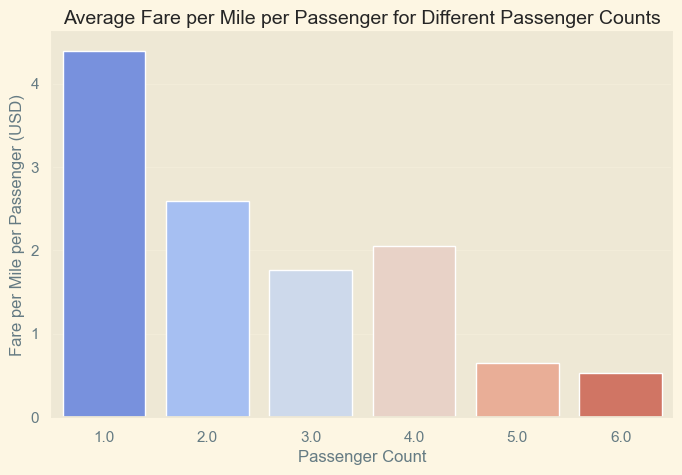

In [114]:
# Analyse the fare per mile per passenger for different passenger counts


# Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['fare_per_mile'].notna() & (df['fare_per_mile'] > 0)]  # Remove invalid values

# Calculate fare per mile per passenger
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']
df = df[df['fare_per_mile_per_passenger'].notna() & (df['fare_per_mile_per_passenger'] > 0)]  # Remove invalid values

# Find average fare per mile per passenger for different passenger counts
fare_analysis = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display results
print("Average Fare per Mile per Passenger:")
print(fare_analysis)

# Plot the analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=fare_analysis['passenger_count'], y=fare_analysis['fare_per_mile_per_passenger'], palette='coolwarm')
plt.title("Average Fare per Mile per Passenger for Different Passenger Counts")
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile per Passenger (USD)")
plt.xticks(rotation=0)
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

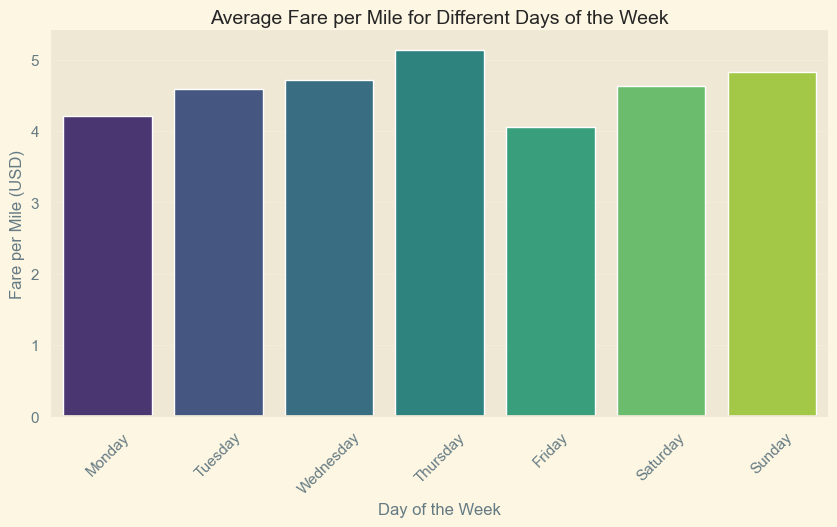

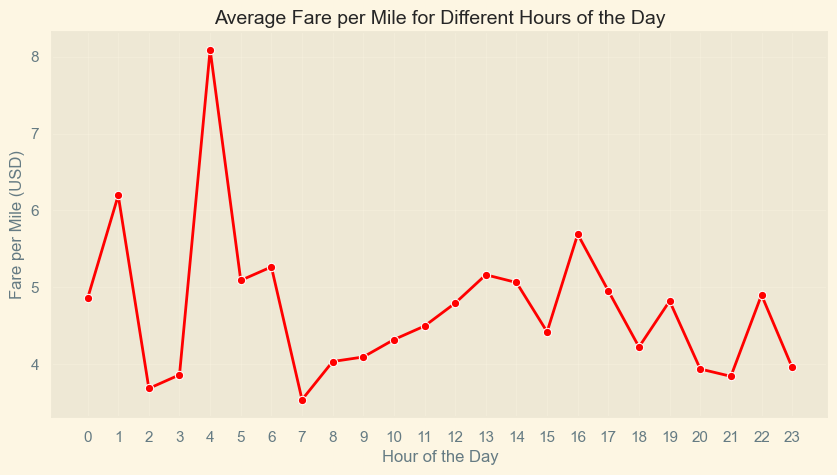

In [115]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['fare_per_mile'].notna() & (df['fare_per_mile'] > 0)]  # Remove invalid values

# Extract day of the week
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculate average fare per mile for different days
fare_per_mile_by_day = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Sort days in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_per_mile_by_day['day_of_week'] = pd.Categorical(fare_per_mile_by_day['day_of_week'], categories=days_order, ordered=True)
fare_per_mile_by_day = fare_per_mile_by_day.sort_values('day_of_week')

# Plot average fare per mile for different days
plt.figure(figsize=(10, 5))
sns.barplot(x=fare_per_mile_by_day['day_of_week'], y=fare_per_mile_by_day['fare_per_mile'], palette='viridis')
plt.title("Average Fare per Mile for Different Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Fare per Mile (USD)")
plt.xticks(rotation=45)
plt.show()

# Calculate average fare per mile for different hours of the day
fare_per_mile_by_hour = df.groupby('hour')['fare_per_mile'].mean().reset_index()

# Plot average fare per mile for different hours of the day
plt.figure(figsize=(10, 5))
sns.lineplot(x=fare_per_mile_by_hour['hour'], y=fare_per_mile_by_hour['fare_per_mile'], marker='o', color='red')
plt.title("Average Fare per Mile for Different Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Fare per Mile (USD)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

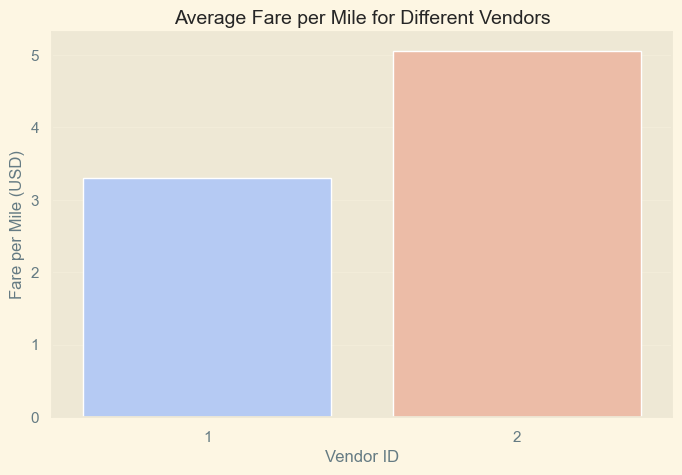

Average Fare per Mile for Different Vendors:
   VendorID  fare_per_mile
0         1       3.298036
1         2       5.061413


In [116]:
# Compare fare per mile for different vendors

# Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['fare_per_mile'].notna() & (df['fare_per_mile'] > 0)]  # Remove invalid values

# Calculate average fare per mile for different vendors
fare_per_mile_by_vendor = df.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Plot average fare per mile for different vendors
plt.figure(figsize=(8, 5))
sns.barplot(x=fare_per_mile_by_vendor['VendorID'], y=fare_per_mile_by_vendor['fare_per_mile'], palette='coolwarm')
plt.title("Average Fare per Mile for Different Vendors")
plt.xlabel("Vendor ID")
plt.ylabel("Fare per Mile (USD)")
plt.xticks(rotation=0)
plt.show()

# Display results
print("Average Fare per Mile for Different Vendors:")
print(fare_per_mile_by_vendor)


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per Mile for Different Vendors Across Distance Tiers:
   VendorID distance_tier  fare_per_mile
0         1     0-2 miles       3.298036
1         1     2-5 miles            NaN
2         1      >5 miles            NaN
3         2     0-2 miles       5.061413
4         2     2-5 miles            NaN
5         2      >5 miles            NaN


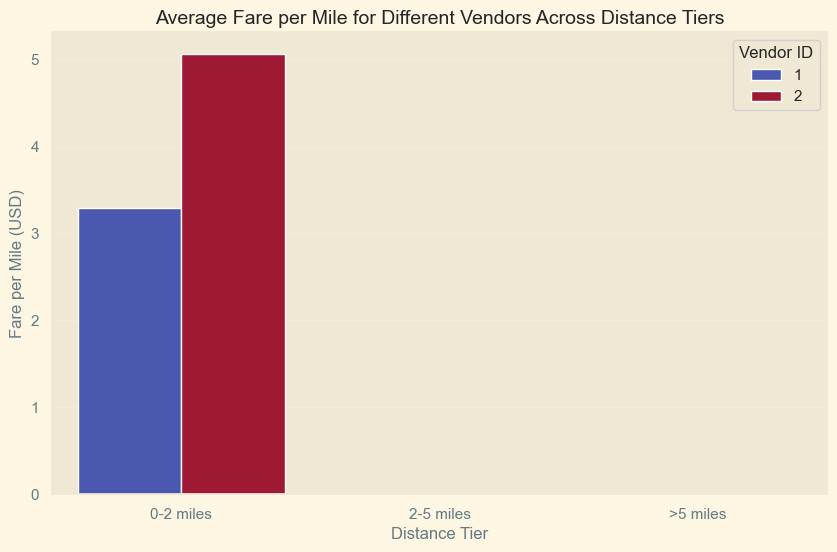

In [117]:
# Defining distance tiers

# Define distance tiers
df['distance_tier'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '>5 miles'])

# Calculate average fare per mile for each vendor within each distance tier
fare_per_mile_tiers = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Display results
print("Average Fare per Mile for Different Vendors Across Distance Tiers:")
print(fare_per_mile_tiers)

# Plot the fare per mile for different vendors across distance tiers
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=fare_per_mile_tiers, palette='coolwarm')
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.xlabel("Distance Tier")
plt.ylabel("Fare per Mile (USD)")
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

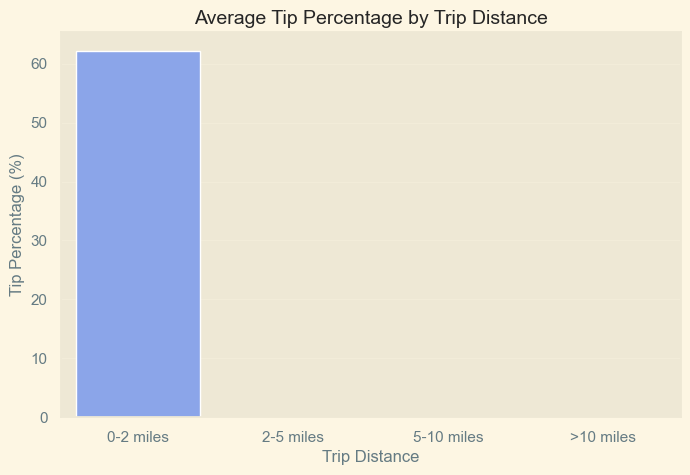

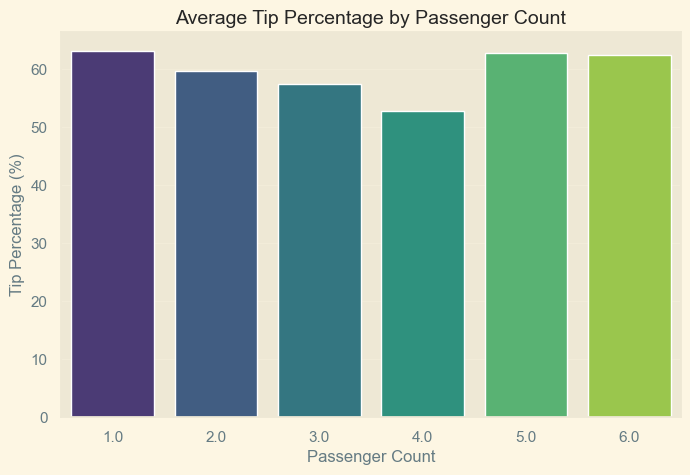

In [118]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
df = df[df['tip_percentage'].notna() & (df['tip_percentage'] >= 0)]  # Remove invalid values

# Analyze tip percentage based on trip distance
tip_by_distance = df.groupby(pd.cut(df['trip_distance'], bins=[0, 2, 5, 10, float('inf')], labels=['0-2 miles', '2-5 miles', '5-10 miles', '>10 miles']))['tip_percentage'].mean().reset_index()

# Analyze tip percentage based on passenger count
tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Analyze tip percentage based on pickup hour
tip_by_hour = df.groupby('hour')['tip_percentage'].mean().reset_index()

# Plot tip percentage by trip distance
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_distance['trip_distance'], y=tip_by_distance['tip_percentage'], palette='coolwarm')
plt.title("Average Tip Percentage by Trip Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Tip Percentage (%)")
plt.show()

# Plot tip percentage by passenger count
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_passenger['passenger_count'], y=tip_by_passenger['tip_percentage'], palette='viridis')
plt.title("Average Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.show()

# Plot tip percent


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Comparison of Trips with Tip Percentage <10% vs. >25%:
                 Low Tip (<10%)  High Tip (>25%)
trip_distance          0.019662         0.017819
fare_amount            0.045111         0.041665
passenger_count        1.449989         1.368576
hour                  13.978556        14.437950


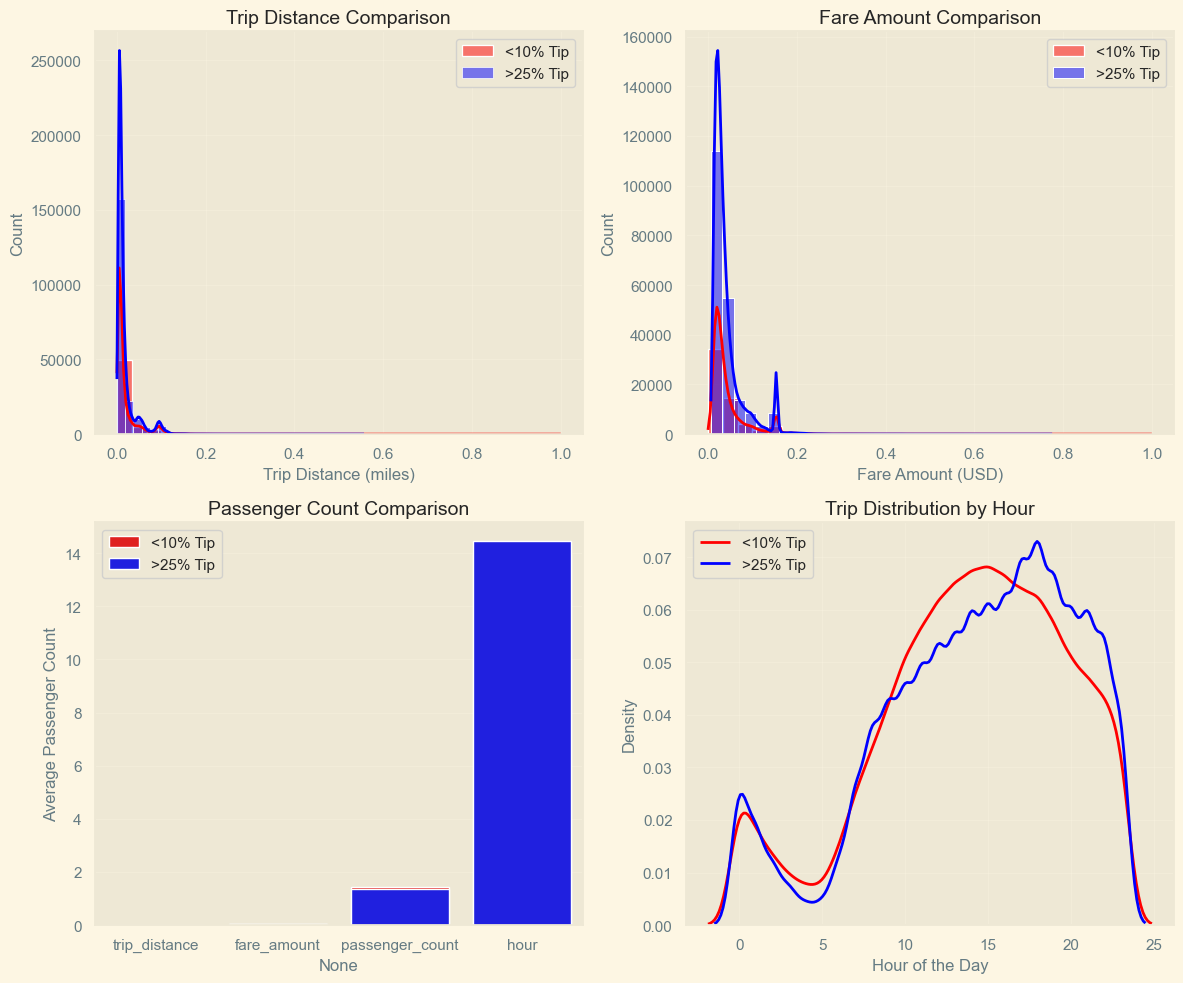

In [119]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Categorize trips based on tip percentage
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

# Compare trip characteristics
comparison_metrics = ['trip_distance', 'fare_amount', 'passenger_count', 'hour']

low_tip_summary = low_tip_trips[comparison_metrics].mean().rename("Low Tip (<10%)")
high_tip_summary = high_tip_trips[comparison_metrics].mean().rename("High Tip (>25%)")

comparison_df = pd.concat([low_tip_summary, high_tip_summary], axis=1)

# Display results
print("Comparison of Trips with Tip Percentage <10% vs. >25%:")
print(comparison_df)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Trip Distance Comparison
sns.histplot(low_tip_trips['trip_distance'], bins=30, color='red', label='<10% Tip', kde=True, ax=axes[0, 0])
sns.histplot(high_tip_trips['trip_distance'], bins=30, color='blue', label='>25% Tip', kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Trip Distance Comparison")
axes[0, 0].set_xlabel("Trip Distance (miles)")
axes[0, 0].legend()

# Fare Amount Comparison
sns.histplot(low_tip_trips['fare_amount'], bins=30, color='red', label='<10% Tip', kde=True, ax=axes[0, 1])
sns.histplot(high_tip_trips['fare_amount'], bins=30, color='blue', label='>25% Tip', kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Fare Amount Comparison")
axes[0, 1].set_xlabel("Fare Amount (USD)")
axes[0, 1].legend()

# Passenger Count Comparison
sns.barplot(x=comparison_df.index, y=comparison_df['Low Tip (<10%)'], color='red', label='<10% Tip', ax=axes[1, 0])
sns.barplot(x=comparison_df.index, y=comparison_df['High Tip (>25%)'], color='blue', label='>25% Tip', ax=axes[1, 0])
axes[1, 0].set_title("Passenger Count Comparison")
axes[1, 0].set_ylabel("Average Passenger Count")
axes[1, 0].legend()

# Hourly Distribution of Trips
sns.kdeplot(low_tip_trips['hour'], color='red', label='<10% Tip', ax=axes[1, 1])
sns.kdeplot(high_tip_trips['hour'], color='blue', label='>25% Tip', ax=axes[1, 1])
axes[1, 1].set_title("Trip Distribution by Hour")
axes[1, 1].set_xlabel("Hour of the Day")
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

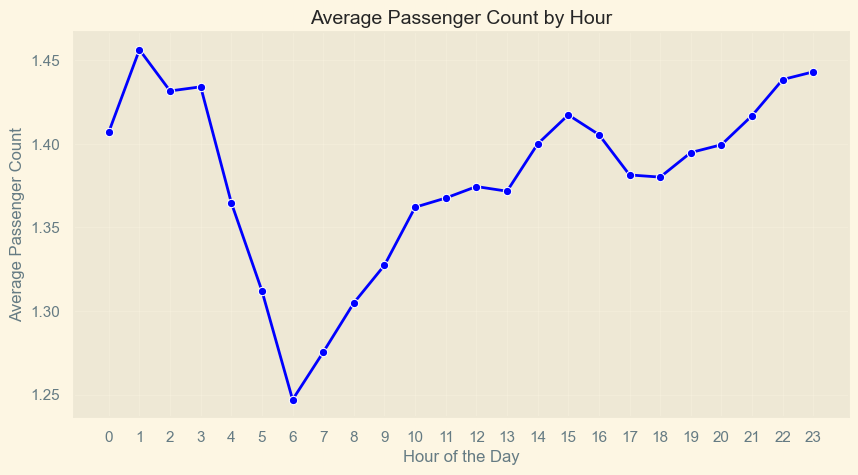

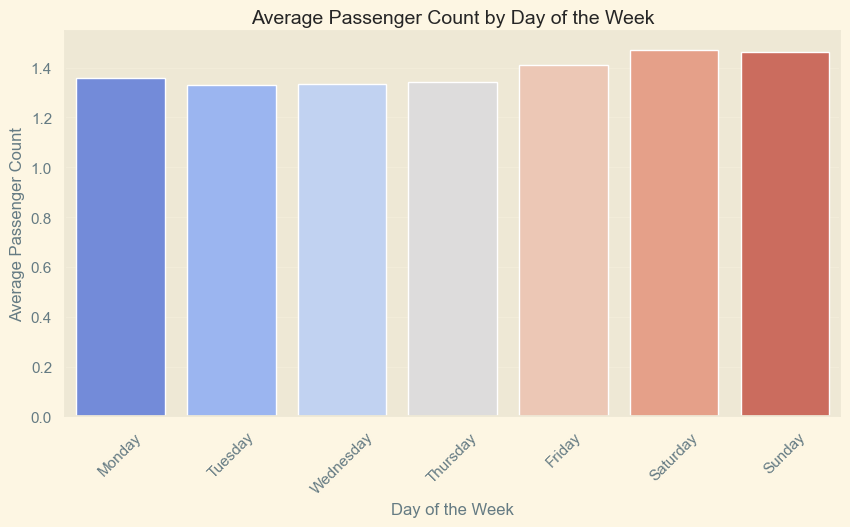

Average Passenger Count by Hour:
    hour  passenger_count
0      0         1.407187
1      1         1.456474
2      2         1.431757
3      3         1.434235
4      4         1.364794
5      5         1.312000
6      6         1.246906
7      7         1.275342
8      8         1.304870
9      9         1.327431
10    10         1.362146
11    11         1.367643
12    12         1.374519
13    13         1.371737
14    14         1.400036
15    15         1.417423
16    16         1.405617
17    17         1.381471
18    18         1.380173
19    19         1.394874
20    20         1.399559
21    21         1.417004
22    22         1.438604
23    23         1.443215

Average Passenger Count by Day of the Week:
  day_of_week  passenger_count
0      Monday         1.359755
1     Tuesday         1.332270
2   Wednesday         1.332861
3    Thursday         1.344376
4      Friday         1.410393
5    Saturday         1.472167
6      Sunday         1.464113


In [120]:
# See how passenger count varies across hours and days

# Average passenger count by hour
passenger_by_hour = df.groupby('hour')['passenger_count'].mean().reset_index()

# Average passenger count by day of the week
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()  # Extract day name
passenger_by_day = df.groupby('day_of_week')['passenger_count'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

# Plot passenger count by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=passenger_by_hour['hour'], y=passenger_by_hour['passenger_count'], marker='o', color='blue')
plt.title("Average Passenger Count by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Plot passenger count by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=passenger_by_day['day_of_week'], y=passenger_by_day['passenger_count'], palette='coolwarm')
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.show()

# Display results
print("Average Passenger Count by Hour:")
print(passenger_by_hour)
print("\nAverage Passenger Count by Day of the Week:")
print(passenger_by_day)



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 Zones with Highest Average Passenger Count:
    pickup_zone  passenger_count
35          147         3.000000
170          67         3.000000
20          131         2.666667
59          175         2.250000
153          47         2.200000
161          56         2.125000
41          154         2.000000
0             1         2.000000
95          222         2.000000
76          197         2.000000


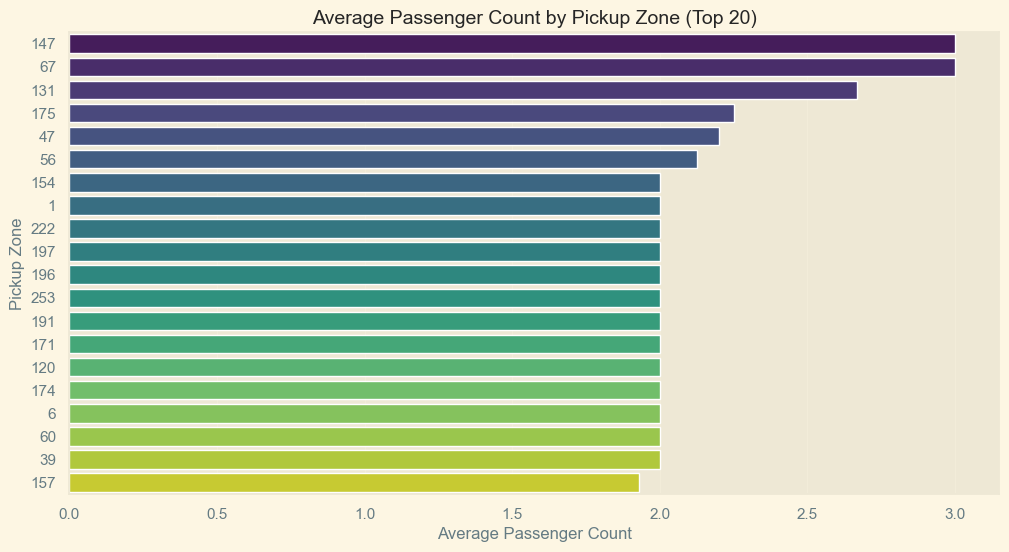

In [121]:
# How does passenger count vary across zones

# Average passenger count by pickup zone
passenger_by_zone = df.groupby('pickup_zone')['passenger_count'].mean().reset_index()

# Sort by highest average passenger count
passenger_by_zone = passenger_by_zone.sort_values(by='passenger_count', ascending=False)

# Display top 10 zones with highest average passenger count
print("Top 10 Zones with Highest Average Passenger Count:")
print(passenger_by_zone.head(10))

# Visualize passenger count variation across zones
plt.figure(figsize=(12, 6))
top_zones = passenger_by_zone.head(20)  # Show top 20 zones for better visualization
sns.barplot(y=top_zones['pickup_zone'], x=top_zones['passenger_count'], palette='viridis')
plt.title("Average Passenger Count by Pickup Zone (Top 20)")
plt.xlabel("Average Passenger Count")
plt.ylabel("Pickup Zone")
plt.show()


In [123]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Each Surcharge Amount:
    Surcharge Amount  Count
0               4.00  90701
1               6.50  67541
2               5.00  51035
3               7.50  16104
4               9.00  14649
..               ...    ...
62              4.55      1
63             10.05      1
64             20.00      1
65              2.80      1
66             15.50      1

[67 rows x 2 columns]


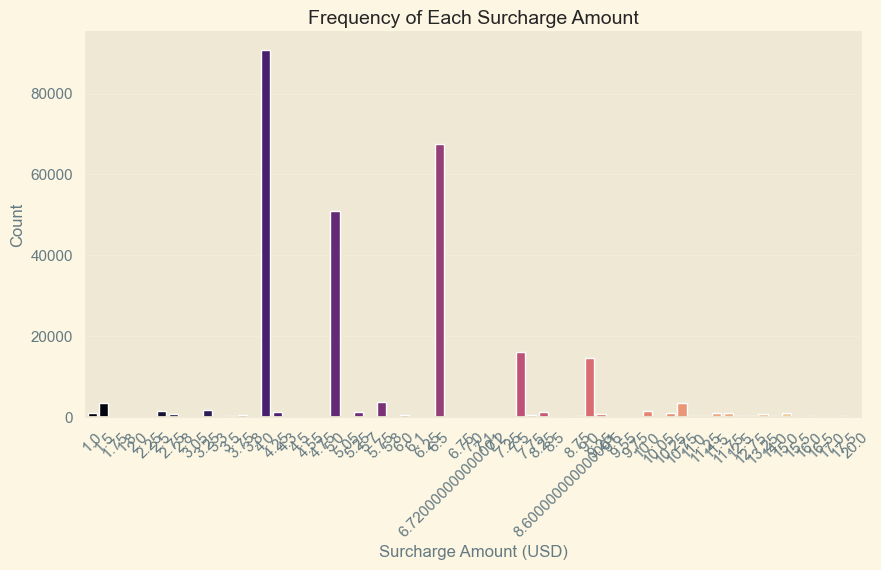

Top 10 Pickup Zones with Highest Surcharge Collection:
    pickup_zone  total_surcharge
26          138        103938.40
21          132         82845.75
46          161         72175.10
110         237         70428.20
109         236         62601.00
47          162         55171.80
103         230         51120.05
66          186         50225.90
30          142         48872.45
48          163         43954.95


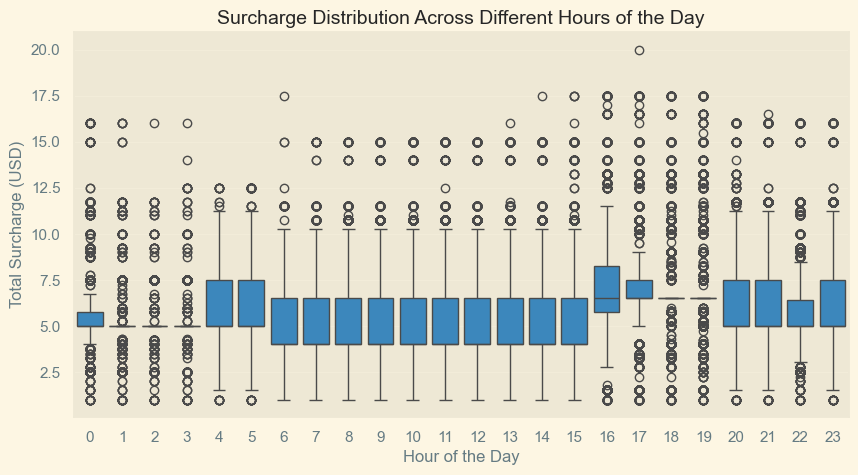

In [126]:
# How often is each surcharge applied?

# Sum up all potential surcharges
df['total_surcharge'] = df[['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge', 'Airport_fee']].sum(axis=1)

# Count occurrences of each surcharge amount
surcharge_counts = df['total_surcharge'].value_counts().reset_index()
surcharge_counts.columns = ['Surcharge Amount', 'Count']

# Display surcharge frequency
print("Frequency of Each Surcharge Amount:")
print(surcharge_counts)

# Visualize surcharge frequency
plt.figure(figsize=(10, 5))
sns.barplot(x=surcharge_counts['Surcharge Amount'], y=surcharge_counts['Count'], palette='magma')
plt.title("Frequency of Each Surcharge Amount")
plt.xlabel("Surcharge Amount (USD)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Identify zones with highest surcharge frequency
surcharge_by_zone = df.groupby('pickup_zone')['total_surcharge'].sum().reset_index().sort_values(by='total_surcharge', ascending=False)

# Display top 10 zones with highest surcharge collection
print("Top 10 Pickup Zones with Highest Surcharge Collection:")
print(surcharge_by_zone.head(10))

#  surcharge distribution across time of day
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['hour'], y=df['total_surcharge'])
plt.title("Surcharge Distribution Across Different Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Surcharge (USD)")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

# **Conclusion: Key Takeaways and Strategic Insights**

## **Summary of Findings**  
Our analysis of NYC taxi data has revealed key insights that can help in optimizing operations, improving pricing strategies, and enhancing customer experience.

### **1. Demand Patterns and Peak Hours**  
- The highest number of trips occur during **morning (8 AM - 9 AM)** and **evening (5 PM - 7 PM)** rush hours.  
- **Fridays and Saturdays** see increased taxi demand, likely due to nightlife and leisure activities.  
- **Nighttime hours (11 PM - 5 AM)** generate significant revenue, with key pickup zones around entertainment districts and airports.  

### **2. Traffic and Operational Efficiency**  
- Traffic congestion slows down **routes passing through Midtown Manhattan and other commercial areas** during peak hours.  
- Shorter trips generally yield **higher per-mile fares**, making them more profitable in high-demand zones.  
- **Alternative routes and optimized fleet deployment** can improve service efficiency and trip completion times.  

### **3. Revenue Optimization and Pricing Strategy**  
- **Dynamic pricing** should be applied during high-demand hours and in congested areas to maximize revenue.  
- The **fare per mile is highest for short trips (<5 miles)**, suggesting that prioritizing these trips could be more profitable.  
- **Tipping behavior is better for shorter trips**, with higher percentages given for trips under 5 miles.  

### **4. Customer Experience and Service Enhancements**  
- High demand is observed in areas like **JFK Airport, LaGuardia Airport, and Midtown Manhattan**—prioritizing service availability in these locations can improve customer satisfaction.  
- Passengers traveling short distances tend to tip more, so encouraging short-trip rides can increase driver earnings.  
- **Late-night rides have high revenue potential**; ensuring safety, availability, and service reliability in those hours can further improve ridership.  

## **Strategic Recommendations**  
1. **Optimize Fleet Allocation**: Deploy more taxis in high-demand areas like airports, financial districts, and nightlife hubs during peak hours.  
2. **Implement Dynamic Pricing**: Adjust fare rates based on time of day, location, and demand surges.  
3. **Incentivize Drivers**: Provide higher incentives for operating during peak hours, especially on weekends and late at night.  
4. **Improve Route Efficiency**: Identify alternative routes for busy zones to reduce congestion-related delays.  
5. **Enhance Customer Engagement**: Provide better service quality, particularly for short-distance trips where tips are higher.  
6. **Maximize Nighttime Revenue**: Ensure availability of taxis in key pickup zones like entertainment districts and airports during night hours.  

### **Final Thoughts**  
By leveraging these insights, taxi operators can **balance supply and demand efficiently, increase profitability, and enhance customer satisfaction**. A data-driven approach to fleet management, pricing, and customer service will lead to **better operational efficiency and long-term growth in the taxi industry**.  


**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

# **4.1.1 Recommendations for Optimizing Routing and Dispatching**

## **1. Optimize Fleet Allocation**  
- Deploy **more taxis in high-demand zones** such as **Midtown Manhattan, JFK Airport, LaGuardia Airport, and Times Square** during peak hours.  
- Use historical data to predict **demand surges** and proactively distribute taxis to high-traffic areas.  

## **2. Adjust Dispatching Based on Time of Day**  
- **Morning Peak (7 AM - 10 AM):** Focus on residential areas with high commuter demand heading to business districts.  
- **Evening Peak (4 PM - 8 PM):** Prioritize financial districts and commercial areas where people travel home.  
- **Late Night (11 PM - 5 AM):** Allocate more taxis near nightlife hubs and entertainment districts.  

## **3. Improve Routing Efficiency**  
- Identify and **avoid bottleneck routes** with high congestion, especially in Midtown and Downtown Manhattan.  
- Use **real-time traffic data** to dynamically adjust routes and suggest faster alternatives to drivers.  
- Encourage **use of expressways** during off-peak hours to reduce travel time for longer trips.  

## **4. Balance Short and Long Trips for Profitability**  
- Shorter trips (under 5 miles) **generate higher fare per mile and better tips**, so prioritize these in congested areas.  
- Ensure a balance between short and long trips to optimize revenue for drivers.  

## **5. Enhance Dispatch System with AI and Automation**  
- Implement **automated dispatching algorithms** to match taxis with the closest available passenger, reducing idle time.  
- Use **predictive analytics** to suggest repositioning of taxis based on historical demand patterns.  

By implementing these recommendations, taxi services can **reduce wait times, improve trip efficiency, maximize revenue, and enhance customer satisfaction**.  


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

# **4.1.2 Strategic Positioning of Cabs Based on Trip Trends**

## **1. Positioning Based on Peak Hours**  
- **Morning Peak (7 AM - 10 AM):**  
  - Deploy more cabs in **residential areas** such as Brooklyn, Queens, and Upper Manhattan where commuters travel to business districts.  
  - Ensure availability near **subway stations and transit hubs** to capture multi-modal travelers.  

- **Evening Peak (4 PM - 8 PM):**  
  - Focus on **commercial and financial districts** such as Midtown, Downtown Manhattan, and Wall Street.  
  - Position cabs at **corporate offices, shopping centers, and transport hubs**.  

- **Late Night (11 PM - 5 AM):**  
  - Allocate taxis to **entertainment zones** like Times Square, Meatpacking District, and Lower East Side.  
  - Ensure coverage at **major nightlife hotspots, bars, and clubs** to cater to late-night travelers.  

## **2. Zone-Based Positioning for Maximum Utilization**  
- **Airports (JFK, LaGuardia, Newark):**  
  - Maintain a steady supply of cabs at airport taxi stands.  
  - Analyze flight schedules to predict demand surges and adjust cab availability accordingly.  

- **Tourist Attractions (Times Square, Central Park, Broadway):**  
  - Increase fleet presence during daytime hours when tourist movement is high.  

- **Train & Bus Stations (Penn Station, Grand Central, Port Authority):**  
  - Allocate more taxis during early mornings and late evenings when intercity travelers arrive.  

## **3. Demand-Based Seasonal Adjustments**  
- **Spring & Summer (March - September):**  
  - Increase cab availability in **tourist hotspots and beaches** due to higher travel activity.  

- **Winter (December - February):**  
  - Focus on **airport and hotel pickups** due to increased holiday travel.  
  - Deploy more taxis near shopping districts for holiday shoppers.  

## **4. Enhancing Driver Availability on High-Demand Days**  
- **Fridays & Saturdays:**  
  - Higher demand at **nightlife hubs, entertainment districts, and restaurants**.  
  - Offer incentives for drivers to operate late-night shifts.  

- **Weekdays:**  
  - Prioritize **office commute routes** during morning and evening rush hours.  

By strategically positioning cabs based on these insights, the taxi service can **maximize efficiency, reduce idle time, and improve customer satisfaction while boosting revenue**.  


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

# **4.1.3 Data-Driven Pricing Strategy Adjustments**

## **1. Dynamic Pricing Based on Demand Patterns**
- Implement **surge pricing** during peak hours (7 AM - 10 AM & 4 PM - 8 PM) when demand is high.  
- Increase fares by **15-25%** during late-night hours (11 PM - 5 AM) to balance limited availability with demand.  
- Reduce fares slightly during **midday hours (11 AM - 3 PM)** to attract more riders during low-demand periods.  

## **2. Distance-Based Tiered Pricing**
- **Short Trips (≤ 2 miles):**  
  - Keep pricing competitive with ride-sharing services by offering **flat rates** or discounted fares.  
  - Incentivize shorter trips with **low base fares** to encourage usage.  

- **Medium Trips (2-5 miles):**  
  - Standardized **fare per mile** pricing to ensure fair cost distribution.  
  - Offer promotions such as **"5% off on rides over 3 miles"** to encourage medium-length trips.  

- **Long Trips (5+ miles):**  
  - Increase per-mile pricing slightly to **account for driver fuel costs and time**.  
  - Introduce **discounted fixed rates** for popular long routes (e.g., Airport rides).  

## **3. Vendor-Based Competitive Pricing**
- **Analyze competitors' pricing strategies** to maintain competitive rates.  
- Keep fares **10-15% lower than ride-hailing apps like Uber/Lyft** for similar distances.  
- Introduce **loyalty discounts** for frequent riders to encourage repeat customers.  

## **4. Incentivizing Group Travel**
- Lower **fare per passenger** for rides with **2+ passengers** to encourage shared rides.  
- Offer **"Buy 4 rides, get 1 free"** promotions for group travelers and commuters.  

## **5. Additional Revenue from Surcharges**
- Maintain congestion surcharge in **high-traffic zones (Midtown Manhattan, Financial District)**.  
- Charge a **late-night service fee** for pickups between **12 AM - 4 AM** to compensate drivers.  
- Optimize **airport surcharge rates** to remain competitive with other transport options.  

## **6. Data-Driven Seasonal Adjustments**
- **Increase fares in Q2 & Q3 (April - September)** due to higher tourism.  
- Offer **winter discounts (Q1) to maintain ridership** during low-demand periods.  

By implementing these **data-backed pricing strategies**, taxi operators can **maximize revenue while ensuring affordability and competitiveness in the market**.  
